In [1]:
!pip install tslearn

In [44]:
!pip install sktime

In [2]:
!pip install awkward

In [3]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
from scipy.signal import decimate
import pathlib
from tqdm.notebook import tqdm
import awkward as ak
import os

In [ ]:
dataset_folder = pathlib.Path('time_series/') # change your location

In [5]:
dataset_folder

PosixPath('time_series')

In [6]:
file_list = list(dataset_folder.iterdir())
for i, path in enumerate(file_list):
    if path.suffix != ".npy":
        file_list.pop(i)
file_list = sorted(file_list)
file_list

[PosixPath('time_series/002qpSULhHAw6DGqFxbaO1_happy.npy'),
 PosixPath('time_series/004h8smbIoAkUNDJvVKwkG_emo.npy'),
 PosixPath('time_series/006ATYzgynEKIPgVaT5LQM_world-music.npy'),
 PosixPath('time_series/00C93bsNIjHStKvr1lPJee_heavy-metal.npy'),
 PosixPath('time_series/00CsDW3I9XueUvaXnAvGMm_progressive-house.npy'),
 PosixPath('time_series/00JZ83w0Qm09f4PwWj06sM_honky-tonk.npy'),
 PosixPath('time_series/00Mk0LnP5u2W5yJmJpG4va_synth-pop.npy'),
 PosixPath('time_series/00NZcRjpixxnyUwltRhj7V_honky-tonk.npy'),
 PosixPath('time_series/00NxqOPo7bEF9QFNU4bJj8_opera.npy'),
 PosixPath('time_series/00PnFrg2QQzPqkeuxGxcz9_piano.npy'),
 PosixPath('time_series/00UZySJXRYQgnOrlzluIIm_sertanejo.npy'),
 PosixPath('time_series/00UoBmyOfYNPbiQUKWu07R_goth.npy'),
 PosixPath('time_series/00X8QXyQ4QAkcpeGzcg5bC_synth-pop.npy'),
 PosixPath('time_series/00YwP3wJWiG8IxAA7OS9lo_songwriter.npy'),
 PosixPath('time_series/00fzPML4lrNag28OPzsB93_mpb.npy'),
 PosixPath('time_series/00hTw7P6jPUio5Qgojw38w_emo.npy

In [ ]:
from pathlib import Path

def load_timeseries_data(file_list):
  """Loads time series data from a list of file paths.

  Args:
      file_list (list[Path]): List of Path objects pointing to .npy files.

  Returns:
      list: List of NumPy arrays containing the time series data, or None if an error occurs.
  """
  import numpy as np  # Import NumPy for loading data

  timeseries_data = []
  for filename in file_list:
    try:
      data = np.load(filename)
      timeseries_data.append(data)
    except FileNotFoundError:
      print(f"File not found: {filename}")
  
  if not timeseries_data:
    print("No valid data loaded from any files.")
    return None  # Indicate no data loaded

  return timeseries_data

timeseries_data = load_timeseries_data(file_list)

In [8]:
timeseries_data

[array([4033.9832331 , 4452.53182549, 4493.08463585, ..., 3163.79769777,
        3135.17003015, 3470.55780845]),
 array([1246.7822784 , 1275.03757568, 1389.82545827, ..., 2652.79362882,
        2693.68073676, 2600.65255211]),
 array([556.52737148, 570.68821915, 632.79195186, ..., 549.71984951,
        575.6562267 , 565.24270312]),
 array([2318.55388356, 2415.40464066, 2587.67859394, ..., 2382.30738393,
        2390.30583421, 2520.16430011]),
 array([2197.09584468, 2299.78000422, 2340.1153661 , ..., 2413.47290771,
        2248.36480191, 2249.08687869]),
 array([1748.53541014, 1743.16278234, 1652.30630064, ..., 1642.19714335,
        1533.31917582, 1406.66385936]),
 array([2909.16127525, 2994.68405888, 2946.45924362, ..., 2101.08406568,
        2217.30312219, 2183.93023427]),
 array([ 849.67020826,  817.65159749,  808.80582257, ..., 1396.59317858,
        1492.73848829, 1475.99065507]),
 array([3190.89409007, 3086.56537794, 3151.57122583, ..., 4991.58106247,
        3941.61323087, 2673.6

In [132]:
y, ids = [], []
for file in os.listdir(dataset_folder):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-4]) # genre

In [133]:
y

['opera',
 'minimal-techno',
 'goth',
 'opera',
 'minimal-techno',
 'emo',
 'new-age',
 'mpb',
 'heavy-metal',
 'heavy-metal',
 'salsa',
 'sleep',
 'sleep',
 'world-music',
 'minimal-techno',
 'honky-tonk',
 'kids',
 'world-music',
 'folk',
 'sleep',
 'j-idol',
 'folk',
 'mpb',
 'happy',
 'salsa',
 'honky-tonk',
 'sertanejo',
 'synth-pop',
 'sleep',
 'sleep',
 'minimal-techno',
 'j-idol',
 'emo',
 'j-idol',
 'songwriter',
 'happy',
 'salsa',
 'j-idol',
 'sleep',
 'goth',
 'sleep',
 'mpb',
 'j-idol',
 'mpb',
 'goth',
 'honky-tonk',
 'songwriter',
 'minimal-techno',
 'j-idol',
 'mpb',
 'new-age',
 'songwriter',
 'synth-pop',
 'goth',
 'progressive-house',
 'folk',
 'salsa',
 'kids',
 'mpb',
 'synth-pop',
 'j-idol',
 'goth',
 'j-idol',
 'happy',
 'songwriter',
 'emo',
 'happy',
 'folk',
 'happy',
 'folk',
 'folk',
 'synth-pop',
 'songwriter',
 'new-age',
 'goth',
 'happy',
 'songwriter',
 'synth-pop',
 'j-idol',
 'kids',
 'emo',
 'kids',
 'kids',
 'mpb',
 'mpb',
 'goth',
 'salsa',
 'progr

In [11]:
def find_unique_y(lst):
    a = []
    for i in y:
        if i not in a:
            a.append(i)
    return a
find_unique_y(y)

['opera',
 'minimal-techno',
 'goth',
 'emo',
 'new-age',
 'mpb',
 'heavy-metal',
 'salsa',
 'sleep',
 'world-music',
 'honky-tonk',
 'kids',
 'folk',
 'j-idol',
 'happy',
 'sertanejo',
 'synth-pop',
 'songwriter',
 'progressive-house',
 'piano']

In [12]:
df = pd.DataFrame(timeseries_data)

In [13]:
df

0            1            2            3            4     \
0     4033.983233  4452.531825  4493.084636  4205.104114  4124.152380   
1     1246.782278  1275.037576  1389.825458  1425.923045  1453.146435   
2      556.527371   570.688219   632.791952   724.284541   700.265785   
3     2318.553884  2415.404641  2587.678594  2679.752782  2476.585990   
4     2197.095845  2299.780004  2340.115366  2230.133271  2162.143986   
...           ...          ...          ...          ...          ...   
9995  2188.144047  2093.063621  2105.867975  2180.974691  2271.958820   
9996  2714.675059  2273.567285  1794.152523  1461.596435  1486.842231   
9997  2302.092948  2354.562900  2498.050464  2485.572104  2368.360732   
9998   356.006344   345.857024   345.962748   344.657068   323.147824   
9999   277.987301   284.186192   294.089063   290.958406   289.316498   

             5            6            7            8            9     ...  \
0     4374.528603  4218.922430  4811.479415  5380.497768  5408.836533  ...   
1     1439.394669  1446.677260  1452.278668  1562.862604  1716.595733  ...   
2      637.978949   580.044365   541.837395   538.979271   561.738058  ...   
3     2354.537616  2351.667896  2319.100690  2417.571585  2431.619017  ...   
4     2060.925716  2085.023936  2122.772450  2095.381438  2073.004571  ...   
...           ...          ...          ...          ...          ...  ...   
9995  2337.953265  2283.548862  2040.402292  2505.220808  2654.573137  ...   
9996  1576.816447  1656.734425  1676.028261  1779.922921  1737.991497  ...   
9997  2397.476901  2450.164601  2463.453644  2638.358828  2428.885493  ...   
9998   310.482640   305.632111   307.441274   302.331457   314.400390  ...   
9999   298.456330   300.274822   299.111098   301.967315   300.353719  ...   

             1270         1271         1272         1273         1274  \
0     4206.281841  3996.986027  4136.007023  4515.116157  4272.059542   
1      845.854602   892.718608   945.693979  2427.495847  4272.999098   
2      685.950471   703.702623   651.783128   600.108454   568.681377   
3     2465.254007  2486.160195  2369.967771  2435.225332  2516.305110   
4     2159.847299  1995.486309  1884.790511  2036.814810  2283.750682   
...           ...          ...          ...          ...          ...   
9995  2419.110117  2628.379807  2722.848311  2448.667368  2172.557628   
9996  2756.124353  2687.478162  2771.815674  2639.636103  2594.053748   
9997  1887.290012  1401.135311  1490.870560  2057.341857  2309.620417   
9998   343.316949   323.554052   311.544505   313.281669   312.271549   
9999   287.362820   287.743691   288.714580   285.405406   281.218507   

             1275         1276         1277         1278         1279  
0     3179.082991  3119.379434  3163.797698  3135.170030  3470.557808  
1     4756.297360  3155.547176  2652.793629  2693.680737  2600.652552  
2      537.072023   536.968066   549.719850   575.656227   565.242703  
3     2457.247966  2398.038946  2382.307384  2390.305834  2520.164300  
4     2403.766504  2551.391082  2413.472908  2248.364802  2249.086879  
...           ...          ...          ...          ...          ...  
9995  2255.473041  2423.722356  2083.729332  1275.714533  1070.484723  
9996  2520.841825  2592.052944  2631.374097  2830.008571  2531.497095  
9997  2334.191132  2324.397193  2277.928664  2288.184316  2237.393099  
9998   316.044189   332.825936   339.339467   346.436080   352.336794  
9999   277.622963   295.527480   286.623827   276.994329   260.720517  

[10000 rows x 1280 columns]

In [14]:
def ts_decimate(ts):
  return pd.Series(decimate(ts, q=1))

In [15]:
def ts_cut(ts):
  return pd.Series(ts)

In [16]:
array_downsampled = df.apply(ts_decimate, axis=1)
array_downsampled

0            1            2            3            4     \
0     3983.866908  4385.518034  4484.265965  4102.663838  4137.444230   
1     1236.094339  1260.967380  1367.903705  1422.905563  1418.354221   
2      549.774196   562.731196   628.430350   713.179308   696.578318   
3     2293.424096  2379.550377  2573.112214  2637.608539  2456.156846   
4     2168.832582  2281.818351  2304.745689  2216.113801  2126.075908   
...           ...          ...          ...          ...          ...   
9995  2164.791931  2077.634482  2060.148343  2184.747067  2214.585129   
9996  2684.587012  2261.350528  1743.152127  1474.794437  1437.482657   
9997  2275.327915  2325.063739  2475.416100  2453.798871  2340.855784   
9998   352.000003   341.847273   342.191187   340.374768   320.297239   
9999   274.709588   280.960889   290.874888   287.509226   286.054622   

             5            6            7            8            9     ...  \
0     4258.599400  4219.276031  4725.003597  5333.118883  5369.609038  ...   
1     1444.261308  1409.821793  1446.809476  1546.074236  1679.580175  ...   
2      628.110475   574.719863   534.574744   532.214353   555.321711  ...   
3     2329.302023  2309.599112  2315.862048  2359.187744  2436.652387  ...   
4     2046.469119  2052.631647  2104.471695  2067.014007  2052.063482  ...   
...           ...          ...          ...          ...          ...  ...   
9995  2342.567892  2230.316549  2035.774369  2462.216103  2635.310138  ...   
9996  1575.497656  1640.390848  1633.301604  1802.637577  1660.446634  ...   
9997  2375.019002  2408.822253  2456.986808  2582.958053  2430.045075  ...   
9998   305.398203   304.134536   301.157969   302.040139   307.502948  ...   
9999   295.089834   296.671769   296.031437   297.994165   297.473056  ...   

             1270         1271         1272         1273         1274  \
0     4166.507646  3970.193544  4045.168909  4526.582764  4165.077953   
1      846.724226   824.398364  1001.953667  2307.190719  4338.751104   
2      680.974640   693.733508   645.939562   593.383918   560.129551   
3     2454.986212  2442.186249  2353.758356  2400.505478  2490.541765   
4     2151.850605  1958.502576  1865.214592  2018.743364  2240.647776   
...           ...          ...          ...          ...          ...   
9995  2396.786855  2597.429437  2697.192440  2418.708050  2148.020884   
9996  2704.338704  2679.574282  2710.567367  2645.149968  2524.096461   
9997  1900.590725  1358.241884  1475.245487  2038.243668  2275.921922   
9998   341.912736   318.422976   307.933070   310.271749   307.511166   
9999   283.158493   286.063391   283.367493   284.599529   275.264430   

             1275         1276         1277         1278         1279  
0     3199.227000  3027.376108  3164.525214  3071.032516  3437.940197  
1     4617.093313  3211.092988  2550.284598  2694.096131  2567.063610  
2      533.420563   527.179461   546.596533   567.054623   559.213208  
3     2430.571001  2367.010676  2357.664251  2359.753879  2490.905261  
4     2402.594046  2497.901382  2408.234218  2210.917831  2221.628334  
...           ...          ...          ...          ...          ...  
9995  2229.067578  2400.646206  2060.807972  1264.006678  1056.952197  
9996  2530.186165  2528.469189  2625.588264  2790.139743  2497.669457  
9997  2320.120038  2292.097708  2252.657864  2266.318381  2203.627785  
9998   313.537622   328.078375   336.028085   342.400412   348.017467  
9999   277.053867   289.918295   285.224585   272.975031   257.766389  

[10000 rows x 1280 columns]

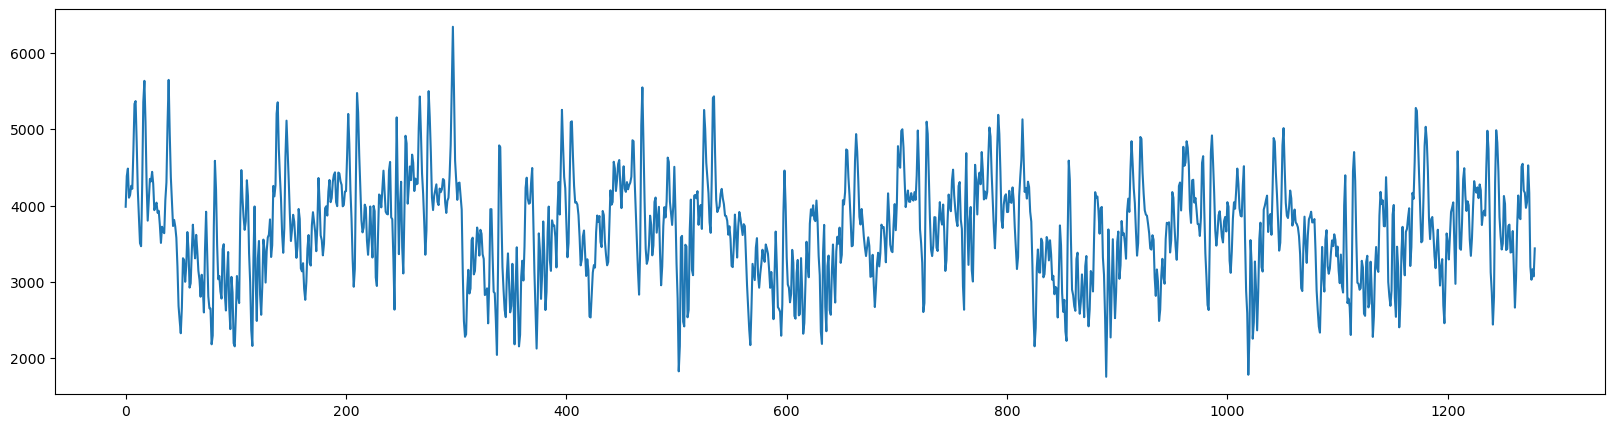

In [17]:
array_downsampled_values = array_downsampled.to_numpy()

plt.figure(figsize=(20,5))

for ts in array_downsampled_values[:1, :10000]:
  plt.plot(ts)
  
plt.show()

## Data Transformations

### Amplitude Scaling

In [18]:
def amplitude_scaling(ts):
  return (ts - ts.mean())/ts.std()

In [19]:
array_transformed = array_downsampled.apply(amplitude_scaling, axis=1)
array_transformed

0         1         2         3         4         5         6     \
0     0.452264  1.044213  1.189747  0.627346  0.678605  0.857162  0.799208   
1    -1.078157 -1.053758 -0.948860 -0.894906 -0.899371 -0.873957 -0.907740   
2    -0.886130 -0.789624 -0.300285  0.330940  0.207293 -0.302668 -0.700330   
3    -0.449934 -0.177708  0.434098  0.637957  0.064428 -0.336532 -0.398808   
4    -0.849151 -0.665869 -0.628677 -0.772453 -0.918509 -1.047645 -1.037648   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.713264 -0.868187 -0.899269 -0.677794 -0.624757 -0.397266 -0.596794   
9996  0.303005 -0.189732 -0.793025 -1.105451 -1.148890 -0.988211 -0.912661   
9997 -0.131275 -0.030199  0.275358  0.231426  0.001895  0.071324  0.140021   
9998  0.097576 -0.181436 -0.171985 -0.221903 -0.773664 -1.183112 -1.217839   
9999 -2.106975 -1.928953 -1.646625 -1.742471 -1.783895 -1.526594 -1.481544   

          7         8         9     ...      1270      1271      1272  \
0     1.544543  2.440777  2.494556  ...  0.721438  0.432113  0.542611   
1    -0.871458 -0.774085 -0.643123  ... -1.460107 -1.482007 -1.307836   
2    -0.999338 -1.016919 -0.844811  ...  0.091074  0.186104 -0.169873   
3    -0.379013 -0.242070  0.002779  ...  0.060728  0.020270 -0.259231   
4    -0.953555 -1.014318 -1.038570  ... -0.876698 -1.190341 -1.341670   
...        ...       ...       ...  ...       ...       ...       ...   
9995 -0.942594 -0.184591  0.123085  ... -0.300892  0.055751  0.233081   
9996 -0.920915 -0.723772 -0.889312  ...  0.326000  0.297169  0.333251   
9997  0.237905  0.493912  0.183152  ... -0.892842 -1.995041 -1.757259   
9998 -1.299640 -1.275396 -1.125270  ... -0.179637 -0.825171 -1.113450   
9999 -1.499779 -1.443885 -1.458725  ... -1.866370 -1.783645 -1.860418   

          1273      1274      1275      1276      1277      1278      1279  
0     1.252113  0.719331 -0.704129 -0.957401 -0.755272 -0.893061 -0.352316  
1    -0.027473  1.965371  2.238409  0.859203  0.210988  0.352059  0.227447  
2    -0.561317 -0.809001 -1.007935 -1.054419 -0.909798 -0.757422 -0.815826  
3    -0.111473  0.173111 -0.016443 -0.217343 -0.246885 -0.240280  0.174260  
4    -1.092621 -0.732654 -0.469950 -0.315346 -0.460801 -0.780881 -0.763507  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.261927 -0.743075 -0.599014 -0.294032 -0.898096 -2.314415 -2.682456  
9996  0.257092  0.116160  0.123249  0.121250  0.234318  0.425890  0.085393  
9997 -0.613094 -0.130068 -0.040245 -0.097194 -0.177347 -0.149585 -0.276989  
9998 -1.049179 -1.125044 -0.959428 -0.559826 -0.341356 -0.166235 -0.011870  
9999 -1.825333 -2.091174 -2.040215 -1.673867 -1.807533 -2.156371 -2.589477  

[10000 rows x 1280 columns]

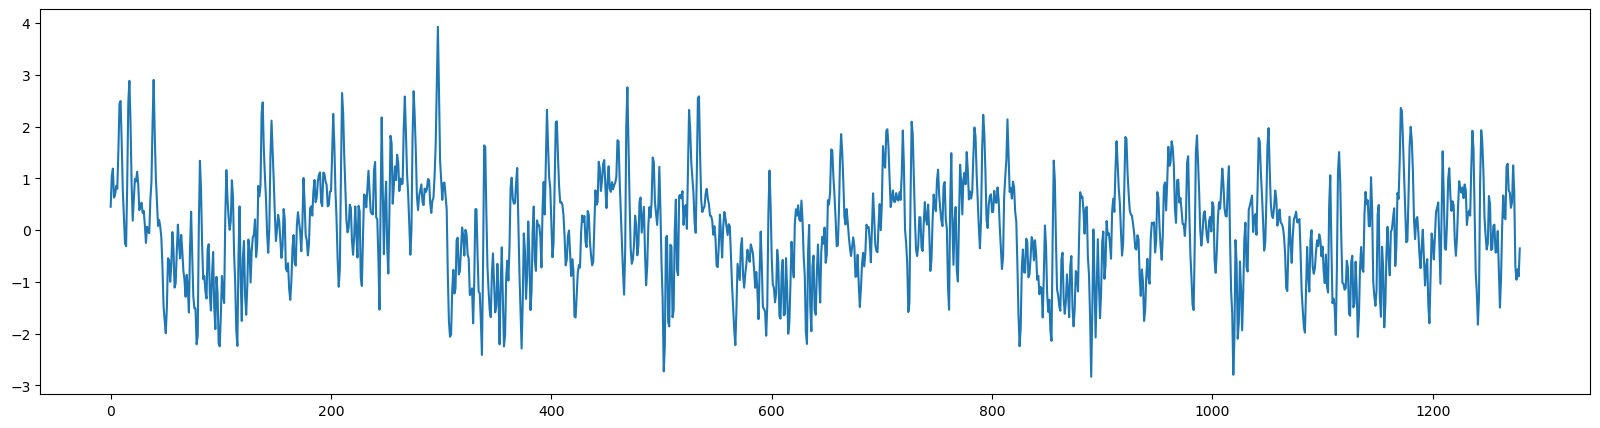

In [20]:
array_transformed_values_as = array_transformed.values

plt.figure(figsize=(20,5))

for ts in array_transformed_values_as[:1, :]:
  plt.plot(ts)

plt.show()

### Noise removal

In [21]:
def noise_removal(ts):
  return ((ts - ts.mean())/ts.std()).rolling(window=10).mean()

In [22]:
array_transformed_ns = array_downsampled.apply(noise_removal, axis=1)
array_transformed_ns

0     1     2     3     4     5     6     7     8         9     ...  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.212842  ...   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.894541  ...   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.530187  ...   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.084480  ...   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.892639  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...       ...  ...   
9995   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.578143  ...   
9996   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.736896  ...   
9997   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.147352  ...   
9998   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -0.735267  ...   
9999   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN -1.661945  ...   

          1270      1271      1272      1273      1274      1275      1276  \
0     0.276856  0.469711  0.616696  0.735021  0.739972  0.645110  0.528105   
1     0.210524 -0.133141 -0.445271 -0.532850 -0.411624 -0.300575 -0.257593   
2    -0.216724 -0.181047 -0.170357 -0.169029 -0.174833 -0.231823 -0.341873   
3    -0.491934 -0.401150 -0.398080 -0.350853 -0.219159 -0.095191 -0.041791   
4    -0.581619 -0.675577 -0.786668 -0.870927 -0.897202 -0.867627 -0.828466   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.045254 -0.026137 -0.230628 -0.482100 -0.687524 -0.690616 -0.568123   
9996  1.382408  1.211693  0.996907  0.789210  0.601547  0.459052  0.374683   
9997  1.302567  0.843965  0.416646  0.128311 -0.083210 -0.244393 -0.354836   
9998  1.145143  1.068525  0.907360  0.677827  0.378422  0.056119 -0.206210   
9999 -2.196162 -2.168341 -2.118113 -2.047603 -2.017350 -2.014910 -1.970426   

          1277      1278      1279  
0     0.329754  0.112203  0.000543  
1    -0.171975 -0.010415  0.157606  
2    -0.447731 -0.515347 -0.580841  
3    -0.059114 -0.090152 -0.066329  
4    -0.813330 -0.810650 -0.802447  
...        ...       ...       ...  
9995 -0.530495 -0.617403 -0.780507  
9996  0.327020  0.286211  0.231977  
9997 -0.465231 -0.566361 -0.612967  
9998 -0.418030 -0.573728 -0.633120  
9999 -1.926201 -1.923443 -1.969440  

[10000 rows x 1280 columns]

In [23]:
array_transformed_ns_filled = array_transformed_ns.fillna(array_transformed_ns.mean())

In [24]:
array_transformed_ns_filled = array_transformed_ns.apply(lambda row: row.fillna(row.mean()), axis=1)

In [25]:
array_transformed_ns_filled

0         1         2         3         4         5         6     \
0    -0.001774 -0.001774 -0.001774 -0.001774 -0.001774 -0.001774 -0.001774   
1     0.001338  0.001338  0.001338  0.001338  0.001338  0.001338  0.001338   
2     0.004399  0.004399  0.004399  0.004399  0.004399  0.004399  0.004399   
3     0.000428  0.000428  0.000428  0.000428  0.000428  0.000428  0.000428   
4     0.005310  0.005310  0.005310  0.005310  0.005310  0.005310  0.005310   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.007021  0.007021  0.007021  0.007021  0.007021  0.007021  0.007021   
9996  0.001307  0.001307  0.001307  0.001307  0.001307  0.001307  0.001307   
9997  0.000787  0.000787  0.000787  0.000787  0.000787  0.000787  0.000787   
9998  0.003298  0.003298  0.003298  0.003298  0.003298  0.003298  0.003298   
9999  0.013618  0.013618  0.013618  0.013618  0.013618  0.013618  0.013618   

          7         8         9     ...      1270      1271      1272  \
0    -0.001774 -0.001774  1.212842  ...  0.276856  0.469711  0.616696   
1     0.001338  0.001338 -0.894541  ...  0.210524 -0.133141 -0.445271   
2     0.004399  0.004399 -0.530187  ... -0.216724 -0.181047 -0.170357   
3     0.000428  0.000428 -0.084480  ... -0.491934 -0.401150 -0.398080   
4     0.005310  0.005310 -0.892639  ... -0.581619 -0.675577 -0.786668   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.007021  0.007021 -0.578143  ...  0.045254 -0.026137 -0.230628   
9996  0.001307  0.001307 -0.736896  ...  1.382408  1.211693  0.996907   
9997  0.000787  0.000787  0.147352  ...  1.302567  0.843965  0.416646   
9998  0.003298  0.003298 -0.735267  ...  1.145143  1.068525  0.907360   
9999  0.013618  0.013618 -1.661945  ... -2.196162 -2.168341 -2.118113   

          1273      1274      1275      1276      1277      1278      1279  
0     0.735021  0.739972  0.645110  0.528105  0.329754  0.112203  0.000543  
1    -0.532850 -0.411624 -0.300575 -0.257593 -0.171975 -0.010415  0.157606  
2    -0.169029 -0.174833 -0.231823 -0.341873 -0.447731 -0.515347 -0.580841  
3    -0.350853 -0.219159 -0.095191 -0.041791 -0.059114 -0.090152 -0.066329  
4    -0.870927 -0.897202 -0.867627 -0.828466 -0.813330 -0.810650 -0.802447  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.482100 -0.687524 -0.690616 -0.568123 -0.530495 -0.617403 -0.780507  
9996  0.789210  0.601547  0.459052  0.374683  0.327020  0.286211  0.231977  
9997  0.128311 -0.083210 -0.244393 -0.354836 -0.465231 -0.566361 -0.612967  
9998  0.677827  0.378422  0.056119 -0.206210 -0.418030 -0.573728 -0.633120  
9999 -2.047603 -2.017350 -2.014910 -1.970426 -1.926201 -1.923443 -1.969440  

[10000 rows x 1280 columns]

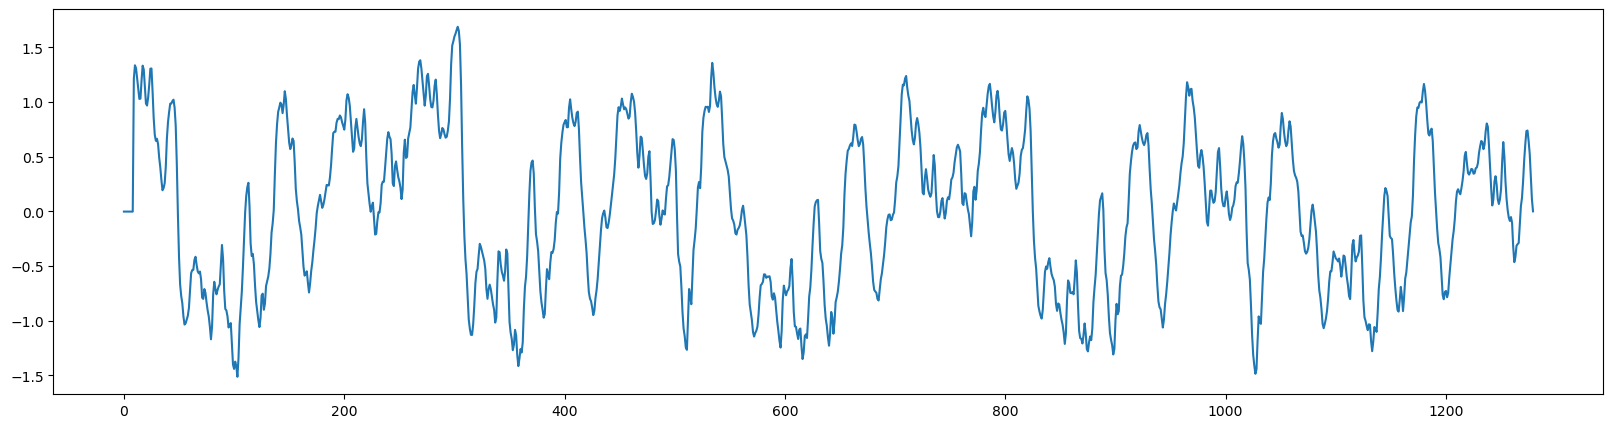

In [26]:
array_transformed_values_ns = array_transformed_ns_filled.values

plt.figure(figsize=(20,5))

for ts in array_transformed_values_ns[:1, :]:
  plt.plot(ts)
plt.show()

### Offset Translation

In [27]:
def offset_translation(df):
  offset = df.iloc[0]
  df = df.iloc[1:] - offset
  return df

In [28]:
array_transformed_ot = array_downsampled.apply(offset_translation, axis=1)

In [29]:
array_transformed_ot

1           2            3            4            5     \
0     401.651126  500.399057   118.796930   153.577322   274.732492   
1      24.873041  131.809366   186.811224   182.259882   208.166970   
2      12.957000   78.656154   163.405112   146.804122    78.336279   
3      86.126281  279.688118   344.184443   162.732750    35.877927   
4     112.985769  135.913107    47.281219   -42.756673  -122.363462   
...          ...         ...          ...          ...          ...   
9995  -87.157449 -104.643588    19.955135    49.793198   177.775960   
9996 -423.236484 -941.434884 -1209.792574 -1247.104354 -1109.089355   
9997   49.735824  200.088184   178.470956    65.527869    99.691087   
9998  -10.152730   -9.808816   -11.625235   -31.702764   -46.601799   
9999    6.251301   16.165300    12.799637    11.345033    20.380245   

             6            7            8            9           10    ...  \
0      235.409123   741.136689  1349.251975  1385.742130  841.643721  ...   
1      173.727454   210.715137   309.979897   443.485836  525.139266  ...   
2       24.945667   -15.199452   -17.559843     5.547514   36.960465  ...   
3       16.175017    22.437953    65.763648   143.228292  191.256286  ...   
4     -116.200934   -64.360887  -101.818575  -116.769100  -48.067675  ...   
...           ...          ...          ...          ...         ...  ...   
9995    65.524618  -129.017562   297.424171   470.518207  234.206113  ...   
9996 -1044.196164 -1051.285407  -881.949435 -1024.140377 -982.660726  ...   
9997   133.494338   181.658893   307.630138   154.717160 -110.460723  ...   
9998   -47.865466   -50.842034   -49.959864   -44.497055  -47.179460  ...   
9999    21.962180    21.321849    23.284577    22.763467   29.737469  ...   

            1270        1271        1272         1273         1274  \
0     182.640738  -13.673364   61.302001   542.715856   181.211044   
1    -389.370113 -411.695975 -234.140672  1071.096380  3102.656765   
2     131.200444  143.959312   96.165366    43.609722    10.355355   
3     161.562116  148.762153   60.334261   107.081382   197.117669   
4     -16.981977 -210.330006 -303.617989  -150.089218    71.815194   
...          ...         ...         ...          ...          ...   
9995  231.994923  432.637506  532.400508   253.916118   -16.771047   
9996   19.751692   -5.012729   25.980355   -39.437043  -160.490550   
9997 -374.737190 -917.086031 -800.082428  -237.084247     0.594007   
9998  -10.087266  -33.577027  -44.066933   -41.728254   -44.488837   
9999    8.448904   11.353802    8.657904     9.889940     0.554841   

             1275         1276         1277         1278         1279  
0     -784.639908  -956.490800  -819.341694  -912.834392  -545.926711  
1     3380.998974  1974.998649  1314.190259  1458.001792  1330.969272  
2      -16.353633   -22.594735    -3.177663    17.280427     9.439012  
3      137.146905    73.586580    64.240155    66.329783   197.481165  
4      233.761464   329.068801   239.401636    42.085249    52.795752  
...           ...          ...          ...          ...          ...  
9995    64.275647   235.854275  -103.983959  -900.785253 -1107.839734  
9996  -154.400847  -156.117823   -58.998748   105.552732  -186.917554  
9997    44.792123    16.769793   -22.670052    -9.009534   -71.700130  
9998   -38.462381   -23.921628   -15.971918    -9.599591    -3.982536  
9999     2.344279    15.208706    10.514997    -1.734557   -16.943199  

[10000 rows x 1279 columns]

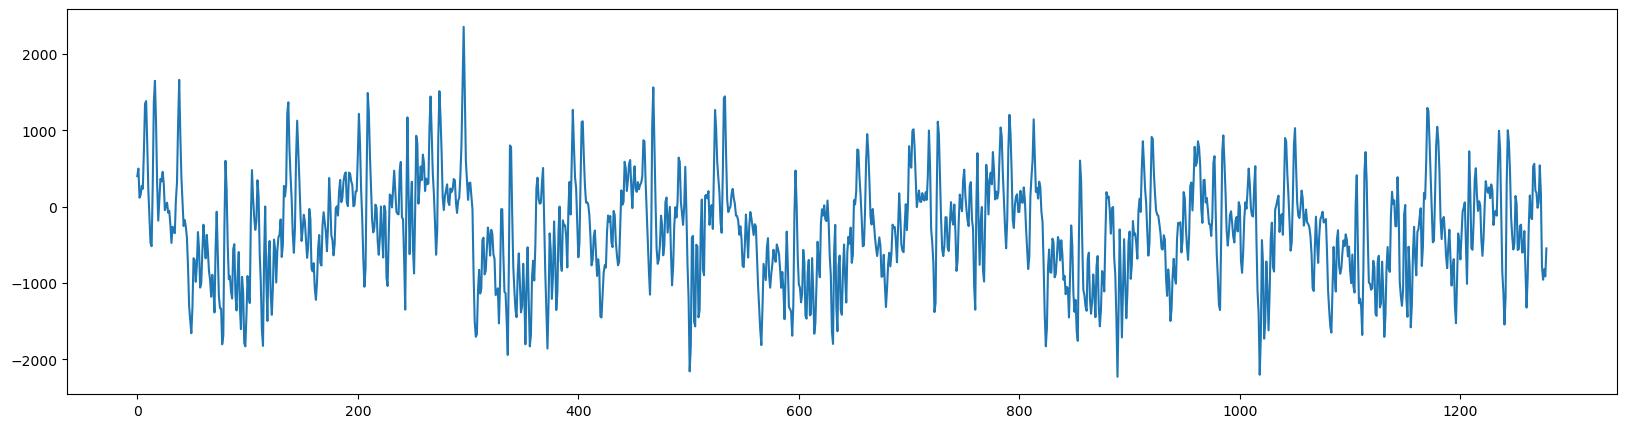

In [30]:
array_transformed_values_ot = array_transformed_ot.values

plt.figure(figsize=(20,5))

for ts in array_transformed_values_ot[:1, :]:
  plt.plot(ts)
plt.show()

## Approximation Array transformed (Noise Removal)

In [46]:
import numpy as np
from sktime.transformations.panel.dictionary_based import _paa

In [ ]:
def approximate(ts, approx):
  return approx.fit_transform(ts)[:, 0]  # select the first column (single feature)

In [48]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [127]:
label_encoded= LabelEncoder().fit_transform(y)

In [50]:
df_1 = pd.DataFrame(array_transformed_ns_filled)
df_1

0         1         2         3         4         5         6     \
0    -0.001774 -0.001774 -0.001774 -0.001774 -0.001774 -0.001774 -0.001774   
1     0.001338  0.001338  0.001338  0.001338  0.001338  0.001338  0.001338   
2     0.004399  0.004399  0.004399  0.004399  0.004399  0.004399  0.004399   
3     0.000428  0.000428  0.000428  0.000428  0.000428  0.000428  0.000428   
4     0.005310  0.005310  0.005310  0.005310  0.005310  0.005310  0.005310   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.007021  0.007021  0.007021  0.007021  0.007021  0.007021  0.007021   
9996  0.001307  0.001307  0.001307  0.001307  0.001307  0.001307  0.001307   
9997  0.000787  0.000787  0.000787  0.000787  0.000787  0.000787  0.000787   
9998  0.003298  0.003298  0.003298  0.003298  0.003298  0.003298  0.003298   
9999  0.013618  0.013618  0.013618  0.013618  0.013618  0.013618  0.013618   

          7         8         9     ...      1270      1271      1272  \
0    -0.001774 -0.001774  1.212842  ...  0.276856  0.469711  0.616696   
1     0.001338  0.001338 -0.894541  ...  0.210524 -0.133141 -0.445271   
2     0.004399  0.004399 -0.530187  ... -0.216724 -0.181047 -0.170357   
3     0.000428  0.000428 -0.084480  ... -0.491934 -0.401150 -0.398080   
4     0.005310  0.005310 -0.892639  ... -0.581619 -0.675577 -0.786668   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.007021  0.007021 -0.578143  ...  0.045254 -0.026137 -0.230628   
9996  0.001307  0.001307 -0.736896  ...  1.382408  1.211693  0.996907   
9997  0.000787  0.000787  0.147352  ...  1.302567  0.843965  0.416646   
9998  0.003298  0.003298 -0.735267  ...  1.145143  1.068525  0.907360   
9999  0.013618  0.013618 -1.661945  ... -2.196162 -2.168341 -2.118113   

          1273      1274      1275      1276      1277      1278      1279  
0     0.735021  0.739972  0.645110  0.528105  0.329754  0.112203  0.000543  
1    -0.532850 -0.411624 -0.300575 -0.257593 -0.171975 -0.010415  0.157606  
2    -0.169029 -0.174833 -0.231823 -0.341873 -0.447731 -0.515347 -0.580841  
3    -0.350853 -0.219159 -0.095191 -0.041791 -0.059114 -0.090152 -0.066329  
4    -0.870927 -0.897202 -0.867627 -0.828466 -0.813330 -0.810650 -0.802447  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.482100 -0.687524 -0.690616 -0.568123 -0.530495 -0.617403 -0.780507  
9996  0.789210  0.601547  0.459052  0.374683  0.327020  0.286211  0.231977  
9997  0.128311 -0.083210 -0.244393 -0.354836 -0.465231 -0.566361 -0.612967  
9998  0.677827  0.378422  0.056119 -0.206210 -0.418030 -0.573728 -0.633120  
9999 -2.047603 -2.017350 -2.014910 -1.970426 -1.926201 -1.923443 -1.969440  

[10000 rows x 1280 columns]

In [128]:
df_1["genre"] = label_encoded

In [129]:
df_1

0         1         2         3         4         5         6  \
0    -0.001774 -0.001774 -0.001774 -0.001774 -0.001774 -0.001774 -0.001774   
1     0.001338  0.001338  0.001338  0.001338  0.001338  0.001338  0.001338   
2     0.004399  0.004399  0.004399  0.004399  0.004399  0.004399  0.004399   
3     0.000428  0.000428  0.000428  0.000428  0.000428  0.000428  0.000428   
4     0.005310  0.005310  0.005310  0.005310  0.005310  0.005310  0.005310   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.007021  0.007021  0.007021  0.007021  0.007021  0.007021  0.007021   
9996  0.001307  0.001307  0.001307  0.001307  0.001307  0.001307  0.001307   
9997  0.000787  0.000787  0.000787  0.000787  0.000787  0.000787  0.000787   
9998  0.003298  0.003298  0.003298  0.003298  0.003298  0.003298  0.003298   
9999  0.013618  0.013618  0.013618  0.013618  0.013618  0.013618  0.013618   

             7         8         9  ...      1271      1272      1273  \
0    -0.001774 -0.001774  1.212842  ...  0.469711  0.616696  0.735021   
1     0.001338  0.001338 -0.894541  ... -0.133141 -0.445271 -0.532850   
2     0.004399  0.004399 -0.530187  ... -0.181047 -0.170357 -0.169029   
3     0.000428  0.000428 -0.084480  ... -0.401150 -0.398080 -0.350853   
4     0.005310  0.005310 -0.892639  ... -0.675577 -0.786668 -0.870927   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.007021  0.007021 -0.578143  ... -0.026137 -0.230628 -0.482100   
9996  0.001307  0.001307 -0.736896  ...  1.211693  0.996907  0.789210   
9997  0.000787  0.000787  0.147352  ...  0.843965  0.416646  0.128311   
9998  0.003298  0.003298 -0.735267  ...  1.068525  0.907360  0.677827   
9999  0.013618  0.013618 -1.661945  ... -2.168341 -2.118113 -2.047603   

          1274      1275      1276      1277      1278      1279  genre  
0     0.739972  0.645110  0.528105  0.329754  0.112203  0.000543     11  
1    -0.411624 -0.300575 -0.257593 -0.171975 -0.010415  0.157606      8  
2    -0.174833 -0.231823 -0.341873 -0.447731 -0.515347 -0.580841      2  
3    -0.219159 -0.095191 -0.041791 -0.059114 -0.090152 -0.066329     11  
4    -0.897202 -0.867627 -0.828466 -0.813330 -0.810650 -0.802447      8  
...        ...       ...       ...       ...       ...       ...    ...  
9995 -0.687524 -0.690616 -0.568123 -0.530495 -0.617403 -0.780507     16  
9996  0.601547  0.459052  0.374683  0.327020  0.286211  0.231977     17  
9997 -0.083210 -0.244393 -0.354836 -0.465231 -0.566361 -0.612967      7  
9998  0.378422  0.056119 -0.206210 -0.418030 -0.573728 -0.633120      7  
9999 -2.017350 -2.014910 -1.970426 -1.926201 -1.923443 -1.969440     14  

[10000 rows x 1281 columns]

In [53]:
unique_values = df_1['genre'].unique()
unique_values

array([11,  8,  2,  0, 10,  9,  4, 14, 16, 19,  5,  7,  1,  6,  3, 15, 18,
       17, 13, 12])

In [54]:
df_filtered = df_1[df_1['genre'].isin([0, 4,12,13,15,16,19])] 
df_melt = df_filtered.melt(value_name="observation", var_name="time", id_vars="genre")

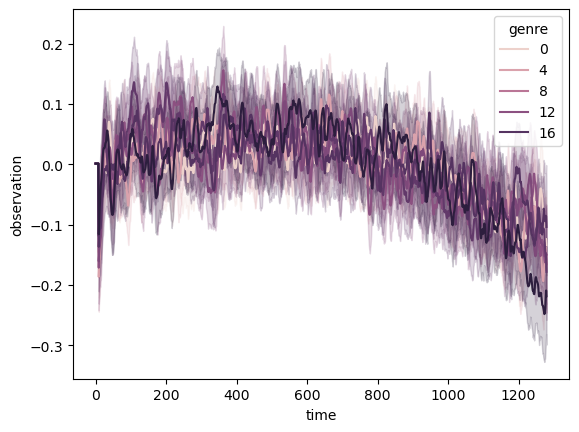

In [55]:
sns.lineplot(df_melt, x="time", y="observation", estimator="mean", hue="genre")
plt.show()

### Approximation Oridinal data

In [130]:
df_2 = pd.DataFrame(array_downsampled)
df_2["genre"] = label_encoded
df_2

0            1            2            3            4  \
0     3983.866908  4385.518034  4484.265965  4102.663838  4137.444230   
1     1236.094339  1260.967380  1367.903705  1422.905563  1418.354221   
2      549.774196   562.731196   628.430350   713.179308   696.578318   
3     2293.424096  2379.550377  2573.112214  2637.608539  2456.156846   
4     2168.832582  2281.818351  2304.745689  2216.113801  2126.075908   
...           ...          ...          ...          ...          ...   
9995  2164.791931  2077.634482  2060.148343  2184.747067  2214.585129   
9996  2684.587012  2261.350528  1743.152127  1474.794437  1437.482657   
9997  2275.327915  2325.063739  2475.416100  2453.798871  2340.855784   
9998   352.000003   341.847273   342.191187   340.374768   320.297239   
9999   274.709588   280.960889   290.874888   287.509226   286.054622   

                5            6            7            8            9  ...  \
0     4258.599400  4219.276031  4725.003597  5333.118883  5369.609038  ...   
1     1444.261308  1409.821793  1446.809476  1546.074236  1679.580175  ...   
2      628.110475   574.719863   534.574744   532.214353   555.321711  ...   
3     2329.302023  2309.599112  2315.862048  2359.187744  2436.652387  ...   
4     2046.469119  2052.631647  2104.471695  2067.014007  2052.063482  ...   
...           ...          ...          ...          ...          ...  ...   
9995  2342.567892  2230.316549  2035.774369  2462.216103  2635.310138  ...   
9996  1575.497656  1640.390848  1633.301604  1802.637577  1660.446634  ...   
9997  2375.019002  2408.822253  2456.986808  2582.958053  2430.045075  ...   
9998   305.398203   304.134536   301.157969   302.040139   307.502948  ...   
9999   295.089834   296.671769   296.031437   297.994165   297.473056  ...   

             1271         1272         1273         1274         1275  \
0     3970.193544  4045.168909  4526.582764  4165.077953  3199.227000   
1      824.398364  1001.953667  2307.190719  4338.751104  4617.093313   
2      693.733508   645.939562   593.383918   560.129551   533.420563   
3     2442.186249  2353.758356  2400.505478  2490.541765  2430.571001   
4     1958.502576  1865.214592  2018.743364  2240.647776  2402.594046   
...           ...          ...          ...          ...          ...   
9995  2597.429437  2697.192440  2418.708050  2148.020884  2229.067578   
9996  2679.574282  2710.567367  2645.149968  2524.096461  2530.186165   
9997  1358.241884  1475.245487  2038.243668  2275.921922  2320.120038   
9998   318.422976   307.933070   310.271749   307.511166   313.537622   
9999   286.063391   283.367493   284.599529   275.264430   277.053867   

             1276         1277         1278         1279  genre  
0     3027.376108  3164.525214  3071.032516  3437.940197     11  
1     3211.092988  2550.284598  2694.096131  2567.063610      8  
2      527.179461   546.596533   567.054623   559.213208      2  
3     2367.010676  2357.664251  2359.753879  2490.905261     11  
4     2497.901382  2408.234218  2210.917831  2221.628334      8  
...           ...          ...          ...          ...    ...  
9995  2400.646206  2060.807972  1264.006678  1056.952197     16  
9996  2528.469189  2625.588264  2790.139743  2497.669457     17  
9997  2292.097708  2252.657864  2266.318381  2203.627785      7  
9998   328.078375   336.028085   342.400412   348.017467      7  
9999   289.918295   285.224585   272.975031   257.766389     14  

[10000 rows x 1281 columns]

In [57]:
df_filtered_1 = df_2[df_2['genre'].isin([0, 4,12,13,15,16,19])]
df_melt_1 = df_filtered_1.melt(value_name="observation", var_name="time", id_vars="genre")

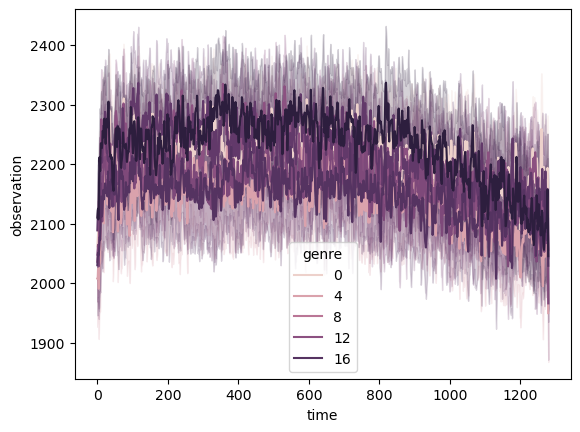

In [58]:
sns.lineplot(df_melt_1, x="time", y="observation", estimator="mean", hue="genre")
plt.show()

### array_transformed

In [59]:
X_train_trans = array_transformed

In [60]:
X_train_val = X_train_trans

In [61]:
X_train_val

0         1         2         3         4         5         6     \
0     0.452264  1.044213  1.189747  0.627346  0.678605  0.857162  0.799208   
1    -1.078157 -1.053758 -0.948860 -0.894906 -0.899371 -0.873957 -0.907740   
2    -0.886130 -0.789624 -0.300285  0.330940  0.207293 -0.302668 -0.700330   
3    -0.449934 -0.177708  0.434098  0.637957  0.064428 -0.336532 -0.398808   
4    -0.849151 -0.665869 -0.628677 -0.772453 -0.918509 -1.047645 -1.037648   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.713264 -0.868187 -0.899269 -0.677794 -0.624757 -0.397266 -0.596794   
9996  0.303005 -0.189732 -0.793025 -1.105451 -1.148890 -0.988211 -0.912661   
9997 -0.131275 -0.030199  0.275358  0.231426  0.001895  0.071324  0.140021   
9998  0.097576 -0.181436 -0.171985 -0.221903 -0.773664 -1.183112 -1.217839   
9999 -2.106975 -1.928953 -1.646625 -1.742471 -1.783895 -1.526594 -1.481544   

          7         8         9     ...      1270      1271      1272  \
0     1.544543  2.440777  2.494556  ...  0.721438  0.432113  0.542611   
1    -0.871458 -0.774085 -0.643123  ... -1.460107 -1.482007 -1.307836   
2    -0.999338 -1.016919 -0.844811  ...  0.091074  0.186104 -0.169873   
3    -0.379013 -0.242070  0.002779  ...  0.060728  0.020270 -0.259231   
4    -0.953555 -1.014318 -1.038570  ... -0.876698 -1.190341 -1.341670   
...        ...       ...       ...  ...       ...       ...       ...   
9995 -0.942594 -0.184591  0.123085  ... -0.300892  0.055751  0.233081   
9996 -0.920915 -0.723772 -0.889312  ...  0.326000  0.297169  0.333251   
9997  0.237905  0.493912  0.183152  ... -0.892842 -1.995041 -1.757259   
9998 -1.299640 -1.275396 -1.125270  ... -0.179637 -0.825171 -1.113450   
9999 -1.499779 -1.443885 -1.458725  ... -1.866370 -1.783645 -1.860418   

          1273      1274      1275      1276      1277      1278      1279  
0     1.252113  0.719331 -0.704129 -0.957401 -0.755272 -0.893061 -0.352316  
1    -0.027473  1.965371  2.238409  0.859203  0.210988  0.352059  0.227447  
2    -0.561317 -0.809001 -1.007935 -1.054419 -0.909798 -0.757422 -0.815826  
3    -0.111473  0.173111 -0.016443 -0.217343 -0.246885 -0.240280  0.174260  
4    -1.092621 -0.732654 -0.469950 -0.315346 -0.460801 -0.780881 -0.763507  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.261927 -0.743075 -0.599014 -0.294032 -0.898096 -2.314415 -2.682456  
9996  0.257092  0.116160  0.123249  0.121250  0.234318  0.425890  0.085393  
9997 -0.613094 -0.130068 -0.040245 -0.097194 -0.177347 -0.149585 -0.276989  
9998 -1.049179 -1.125044 -0.959428 -0.559826 -0.341356 -0.166235 -0.011870  
9999 -1.825333 -2.091174 -2.040215 -1.673867 -1.807533 -2.156371 -2.589477  

[10000 rows x 1280 columns]

In [62]:
# standardization 
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance()

scaler.fit(X_train_val)

X_train_scaled = scaler.transform(X_train_val)

/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/tslearn/preprocessing/preprocessing.py:289: RuntimeWarning: Mean of empty slice
  mean_t = numpy.nanmean(X_, axis=1, keepdims=True)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [63]:
X_train_scaled.dtype

dtype('float64')

### PPA

### array_transformed

In [64]:
!pip install pyts

In [65]:
from pyts.approximation import DiscreteFourierTransform

In [66]:
from tslearn.piecewise import PiecewiseAggregateApproximation

n_paa_segments = 128

paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)

paa.fit(X_train_scaled)

PiecewiseAggregateApproximation(n_segments=128)

In [67]:
X_train_paa = paa.transform(X_train_scaled)

/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/tslearn/piecewise/piecewise.py:152: RuntimeWarning: Mean of empty slice.
  X_transformed[i_ts, i_seg, :] = segment.mean(axis=0)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [68]:
X_train_paa

array([[[ 1.21331616e+00],
        [ 1.13781412e+00],
        [ 6.45860545e-01],
        ...,
        [-5.18046920e-02],
        [ 1.25596209e-01],
        [ 5.42941384e-04]],

       [[-8.94890999e-01],
        [ 1.75508072e-01],
        [-1.00118780e+00],
        ...,
        [ 5.73582760e-01],
        [ 5.30570694e-01],
        [ 1.57667112e-01]],

       [[-5.30394339e-01],
        [-2.35852844e-01],
        [ 4.94612464e-02],
        ...,
        [-8.14815153e-01],
        [-2.44520613e-01],
        [-5.81068390e-01]],

       ...,

       [[ 1.47409578e-01],
        [ 6.77656418e-01],
        [ 7.05240699e-01],
        ...,
        [-1.30132232e-01],
        [ 1.60304845e+00],
        [-6.13206101e-01]],

       [[-7.35554308e-01],
        [-1.19492779e+00],
        [-8.41348538e-01],
        ...,
        [ 2.35965767e-01],
        [ 1.16236806e+00],
        [-6.33367277e-01]],

       [[-1.66259418e+00],
        [-1.06953876e+00],
        [-1.38859943e+00],
        ...,
        

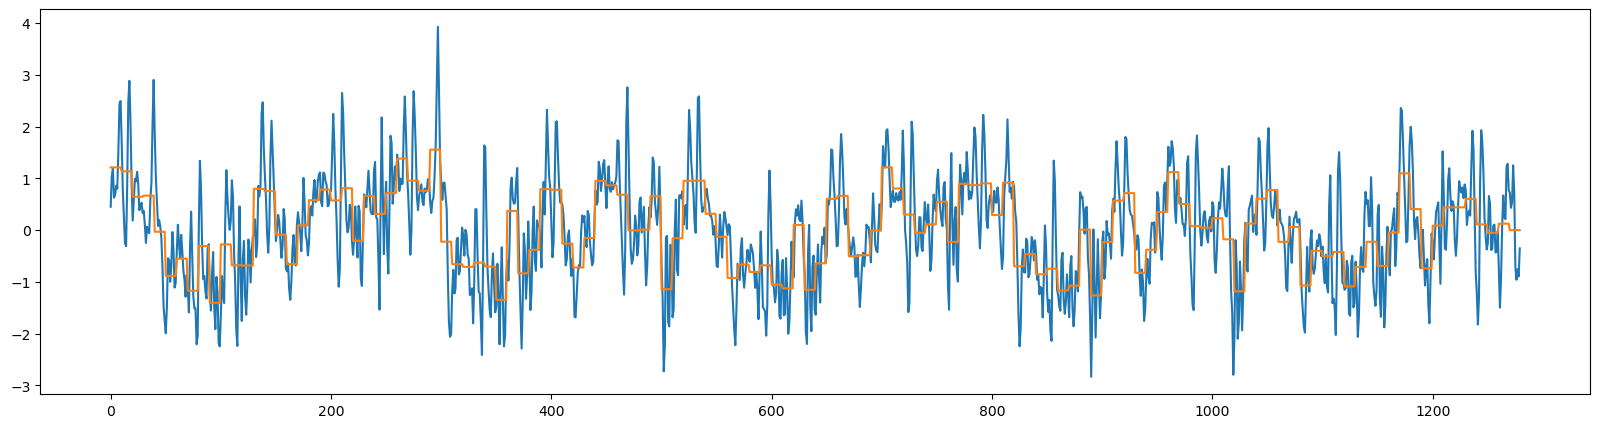

In [69]:
plt.figure(figsize=(20,5))
paa_inv = paa.inverse_transform(X_train_paa)
plt.plot(X_train_scaled[0,:, 0])
plt.plot(paa_inv[0, :, 0])
plt.show()

In [70]:
df_train_paa = pd.DataFrame(X_train_paa[:, :, 0])

In [71]:
df_train_paa.to_csv("ts_data_TRAIN_PAA.csv")

In [72]:
X_train_scaled.shape

(10000, 1280, 1)

In [73]:
X_train_scaled.dtype

dtype('float64')

In [74]:
df_train_paa

0         1         2         3         4         5         6    \
0     1.213316  1.137814  0.645861  0.667724 -0.030246 -0.883547 -0.550595   
1    -0.894891  0.175508 -1.001188  0.503465  0.097005  0.299594 -0.411864   
2    -0.530394 -0.235853  0.049461  0.230400  0.219451  0.080678 -0.170327   
3    -0.084513 -0.118392 -0.062462  0.898557  1.112714  0.182046  0.960317   
4    -0.892988 -0.990429 -0.662160 -0.873229 -0.054402  1.995279  0.562312   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.578369 -0.206714 -0.795595 -0.267347 -0.591074 -0.498849  0.530306   
9996 -0.737184 -0.107619  0.818489  0.445472 -0.744383 -0.598006 -0.442748   
9997  0.147410  0.677656  0.705241  2.374190  1.158070  0.705399  0.425836   
9998 -0.735554 -1.194928 -0.841349 -1.306410 -1.430784 -1.711174 -0.827561   
9999 -1.662594 -1.069539 -1.388599 -1.005327 -0.656248 -0.778436 -0.965052   

           7         8         9    ...       118       119       120  \
0    -1.170824 -0.307245 -1.401895  ...  0.406954 -0.736809  0.087550   
1    -0.333397  0.604469 -0.067900  ... -0.161277  0.752944 -0.749253   
2    -0.845310 -0.626803 -1.071117  ...  1.062128 -0.359995 -1.022373   
3     0.829887 -0.265665  0.029650  ... -0.306040 -1.208996 -0.543111   
4     0.589704  1.856029 -0.258994  ... -0.306163 -0.008890  0.450035   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.367928 -0.441712 -0.424688  ...  0.633663  0.024735  0.572892   
9996 -0.399371  0.454201  0.709059  ... -0.446921 -0.342456 -0.183811   
9997 -0.450086 -0.550773  1.168113  ... -0.435684  0.024149  1.436833   
9998 -0.780702  0.026650 -0.932197  ... -1.120248 -0.671197  0.001903   
9999 -0.971209 -1.073178 -1.458200  ...  0.563861  0.722091  0.364930   

           121       122       123       124       125       126       127  
0     0.440579  0.441892  0.604900  0.111871 -0.051805  0.125596  0.000543  
1     0.276499  0.077610 -0.174617 -0.272169  0.573583  0.530571  0.157667  
2    -1.050350 -1.669592 -0.886968 -1.146626 -0.814815 -0.244521 -0.581068  
3    -0.611405 -1.343328 -0.154571 -0.069221 -1.032356 -0.673896 -0.066354  
4     1.214581  0.918433  0.476851 -0.038129 -0.313122 -0.491248 -0.802761  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.152033 -0.054652 -0.434529 -0.930654 -1.045076 -0.046296 -0.780812  
9996  0.682221 -0.277592 -0.538303 -0.547909 -0.328605  1.393899  0.232068  
9997 -0.425480  2.275624  0.903240  0.916925 -0.130132  1.603048 -0.613206  
9998  0.176313  0.332818  0.376011 -0.025333  0.235966  1.162368 -0.633367  
9999 -1.420083 -2.087483 -2.273128 -1.833247 -1.667915 -2.177683 -1.970210  

[10000 rows x 128 columns]

### Symbolic Aggregate Approximation (SAX)

In [166]:
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
n_paa_segments = 128

sax = SymbolicAggregateApproximation(
    n_segments = n_paa_segments,
    alphabet_size_avg = 14
)

sax.fit(X_train_scaled)

X_train_sax = sax.transform(X_train_scaled)

/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/tslearn/piecewise/piecewise.py:152: RuntimeWarning: Mean of empty slice.
  X_transformed[i_ts, i_seg, :] = segment.mean(axis=0)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [167]:
X_train_sax.shape

(10000, 128, 1)

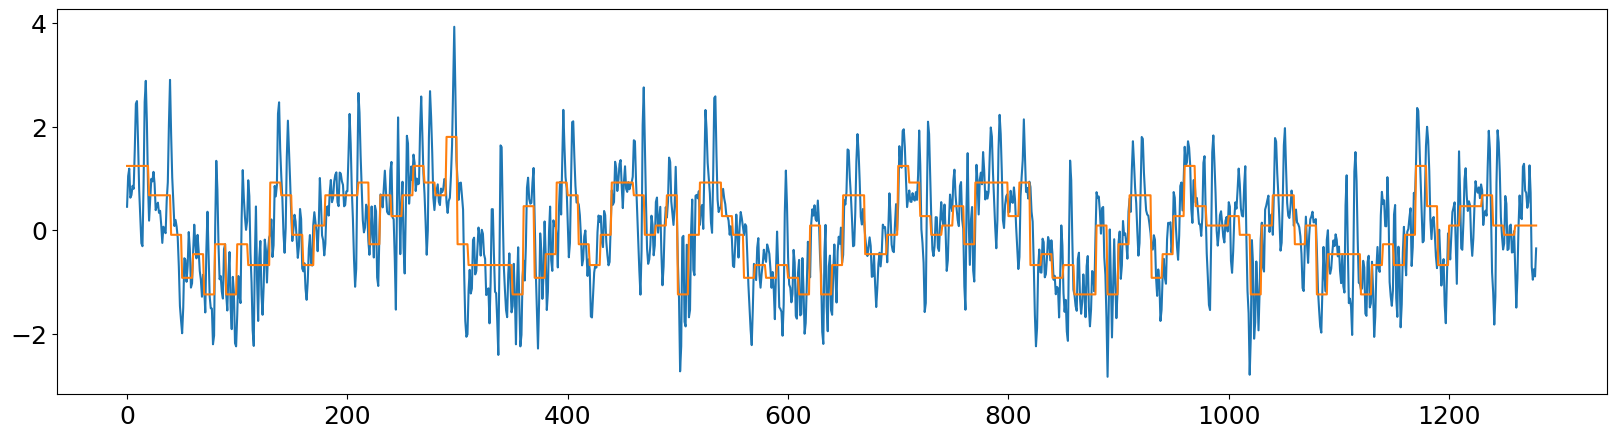

In [168]:
plt.figure(figsize=(20,5))

sax_inv = sax.inverse_transform(X_train_sax)

plt.plot(X_train_scaled[0, :, 0])
plt.plot(sax_inv[0, :, 0])

plt.show()

In [169]:
sax_inv.shape

(10000, 1280, 1)

In [170]:
df_train_sax = pd.DataFrame(X_train_paa[:, :, 0])

In [171]:
df_train_sax

0         1         2         3         4         5         6    \
0     1.213316  1.137814  0.645861  0.667724 -0.030246 -0.883547 -0.550595   
1    -0.894891  0.175508 -1.001188  0.503465  0.097005  0.299594 -0.411864   
2    -0.530394 -0.235853  0.049461  0.230400  0.219451  0.080678 -0.170327   
3    -0.084513 -0.118392 -0.062462  0.898557  1.112714  0.182046  0.960317   
4    -0.892988 -0.990429 -0.662160 -0.873229 -0.054402  1.995279  0.562312   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.578369 -0.206714 -0.795595 -0.267347 -0.591074 -0.498849  0.530306   
9996 -0.737184 -0.107619  0.818489  0.445472 -0.744383 -0.598006 -0.442748   
9997  0.147410  0.677656  0.705241  2.374190  1.158070  0.705399  0.425836   
9998 -0.735554 -1.194928 -0.841349 -1.306410 -1.430784 -1.711174 -0.827561   
9999 -1.662594 -1.069539 -1.388599 -1.005327 -0.656248 -0.778436 -0.965052   

           7         8         9    ...       118       119       120  \
0    -1.170824 -0.307245 -1.401895  ...  0.406954 -0.736809  0.087550   
1    -0.333397  0.604469 -0.067900  ... -0.161277  0.752944 -0.749253   
2    -0.845310 -0.626803 -1.071117  ...  1.062128 -0.359995 -1.022373   
3     0.829887 -0.265665  0.029650  ... -0.306040 -1.208996 -0.543111   
4     0.589704  1.856029 -0.258994  ... -0.306163 -0.008890  0.450035   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.367928 -0.441712 -0.424688  ...  0.633663  0.024735  0.572892   
9996 -0.399371  0.454201  0.709059  ... -0.446921 -0.342456 -0.183811   
9997 -0.450086 -0.550773  1.168113  ... -0.435684  0.024149  1.436833   
9998 -0.780702  0.026650 -0.932197  ... -1.120248 -0.671197  0.001903   
9999 -0.971209 -1.073178 -1.458200  ...  0.563861  0.722091  0.364930   

           121       122       123       124       125       126       127  
0     0.440579  0.441892  0.604900  0.111871 -0.051805  0.125596  0.000543  
1     0.276499  0.077610 -0.174617 -0.272169  0.573583  0.530571  0.157667  
2    -1.050350 -1.669592 -0.886968 -1.146626 -0.814815 -0.244521 -0.581068  
3    -0.611405 -1.343328 -0.154571 -0.069221 -1.032356 -0.673896 -0.066354  
4     1.214581  0.918433  0.476851 -0.038129 -0.313122 -0.491248 -0.802761  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.152033 -0.054652 -0.434529 -0.930654 -1.045076 -0.046296 -0.780812  
9996  0.682221 -0.277592 -0.538303 -0.547909 -0.328605  1.393899  0.232068  
9997 -0.425480  2.275624  0.903240  0.916925 -0.130132  1.603048 -0.613206  
9998  0.176313  0.332818  0.376011 -0.025333  0.235966  1.162368 -0.633367  
9999 -1.420083 -2.087483 -2.273128 -1.833247 -1.667915 -2.177683 -1.970210  

[10000 rows x 128 columns]

### PAA oridinal data

In [81]:
X_train= array_downsampled
X_train_o= X_train

In [82]:
X_train_o

0            1            2            3            4  \
0     3983.866908  4385.518034  4484.265965  4102.663838  4137.444230   
1     1236.094339  1260.967380  1367.903705  1422.905563  1418.354221   
2      549.774196   562.731196   628.430350   713.179308   696.578318   
3     2293.424096  2379.550377  2573.112214  2637.608539  2456.156846   
4     2168.832582  2281.818351  2304.745689  2216.113801  2126.075908   
...           ...          ...          ...          ...          ...   
9995  2164.791931  2077.634482  2060.148343  2184.747067  2214.585129   
9996  2684.587012  2261.350528  1743.152127  1474.794437  1437.482657   
9997  2275.327915  2325.063739  2475.416100  2453.798871  2340.855784   
9998   352.000003   341.847273   342.191187   340.374768   320.297239   
9999   274.709588   280.960889   290.874888   287.509226   286.054622   

                5            6            7            8            9  ...  \
0     4258.599400  4219.276031  4725.003597  5333.118883  5369.609038  ...   
1     1444.261308  1409.821793  1446.809476  1546.074236  1679.580175  ...   
2      628.110475   574.719863   534.574744   532.214353   555.321711  ...   
3     2329.302023  2309.599112  2315.862048  2359.187744  2436.652387  ...   
4     2046.469119  2052.631647  2104.471695  2067.014007  2052.063482  ...   
...           ...          ...          ...          ...          ...  ...   
9995  2342.567892  2230.316549  2035.774369  2462.216103  2635.310138  ...   
9996  1575.497656  1640.390848  1633.301604  1802.637577  1660.446634  ...   
9997  2375.019002  2408.822253  2456.986808  2582.958053  2430.045075  ...   
9998   305.398203   304.134536   301.157969   302.040139   307.502948  ...   
9999   295.089834   296.671769   296.031437   297.994165   297.473056  ...   

             1271         1272         1273         1274         1275  \
0     3970.193544  4045.168909  4526.582764  4165.077953  3199.227000   
1      824.398364  1001.953667  2307.190719  4338.751104  4617.093313   
2      693.733508   645.939562   593.383918   560.129551   533.420563   
3     2442.186249  2353.758356  2400.505478  2490.541765  2430.571001   
4     1958.502576  1865.214592  2018.743364  2240.647776  2402.594046   
...           ...          ...          ...          ...          ...   
9995  2597.429437  2697.192440  2418.708050  2148.020884  2229.067578   
9996  2679.574282  2710.567367  2645.149968  2524.096461  2530.186165   
9997  1358.241884  1475.245487  2038.243668  2275.921922  2320.120038   
9998   318.422976   307.933070   310.271749   307.511166   313.537622   
9999   286.063391   283.367493   284.599529   275.264430   277.053867   

             1276         1277         1278         1279  genre  
0     3027.376108  3164.525214  3071.032516  3437.940197     11  
1     3211.092988  2550.284598  2694.096131  2567.063610      8  
2      527.179461   546.596533   567.054623   559.213208      2  
3     2367.010676  2357.664251  2359.753879  2490.905261     11  
4     2497.901382  2408.234218  2210.917831  2221.628334      8  
...           ...          ...          ...          ...    ...  
9995  2400.646206  2060.807972  1264.006678  1056.952197     16  
9996  2528.469189  2625.588264  2790.139743  2497.669457     17  
9997  2292.097708  2252.657864  2266.318381  2203.627785      7  
9998   328.078375   336.028085   342.400412   348.017467      7  
9999   289.918295   285.224585   272.975031   257.766389     14  

[10000 rows x 1281 columns]

In [83]:
scaler.fit(X_train_o)
X_train_scaled_o = scaler.transform(X_train_o)

In [84]:
X_train_scaled_o

array([[[ 4.51717101e-01],
        [ 1.03748682e+00],
        [ 1.18150123e+00],
        ...,
        [-8.79564488e-01],
        [-3.44464754e-01],
        [-5.34232902e+00]],

       [[-1.07502997e+00],
        [-1.05066143e+00],
        [-9.45894111e-01],
        ...,
        [ 3.53398934e-01],
        [ 2.28943035e-01],
        [-2.27821466e+00]],

       [[-8.74557857e-01],
        [-7.78893608e-01],
        [-2.93822993e-01],
        ...,
        [-7.46972846e-01],
        [-8.04867654e-01],
        [-4.91888952e+00]],

       ...,

       [[-1.26567236e-01],
        [-2.62883005e-02],
        [ 2.76856864e-01],
        ...,
        [-1.44732542e-01],
        [-2.71131296e-01],
        [-4.70004142e+00]],

       [[ 1.01548544e-01],
        [-1.68546470e-01],
        [-1.59397261e-01],
        ...,
        [-1.53831201e-01],
        [-4.39960760e-03],
        [-9.07655216e+00]],

       [[-2.03035865e+00],
        [-1.85820185e+00],
        [-1.58517671e+00],
        ...,
        

In [85]:
n_paa_segments = 128

paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)

paa.fit(X_train_scaled_o)

PiecewiseAggregateApproximation(n_segments=128)

In [86]:
X_train_paa_o = paa.transform(X_train_scaled_o)

In [87]:
X_train_paa_o

array([[[ 1.20435534],
        [ 1.12967063],
        [ 0.6430426 ],
        ...,
        [-0.0470702 ],
        [ 0.12841029],
        [ 0.00471076]],

       [[-0.89164375],
        [ 0.17700014],
        [-0.99776625],
        ...,
        [ 0.57442208],
        [ 0.53148055],
        [ 0.15918843]],

       [[-0.52171977],
        [-0.22986143],
        [ 0.05285356],
        ...,
        [-0.80354962],
        [-0.23845024],
        [-0.5719322 ]],

       ...,

       [[ 0.14986102],
        [ 0.6757177 ],
        [ 0.7030736 ],
        ...,
        [-0.1253829 ],
        [ 1.59344799],
        [-0.60445718]],

       [[-0.70467647],
        [-1.14919446],
        [-0.80704946],
        ...,
        [ 0.23542603],
        [ 1.13186978],
        [-0.60579402]],

       [[-1.59999125],
        [-1.02669995],
        [-1.33512763],
        ...,
        [-1.60513517],
        [-2.09791431],
        [-1.89735563]]])

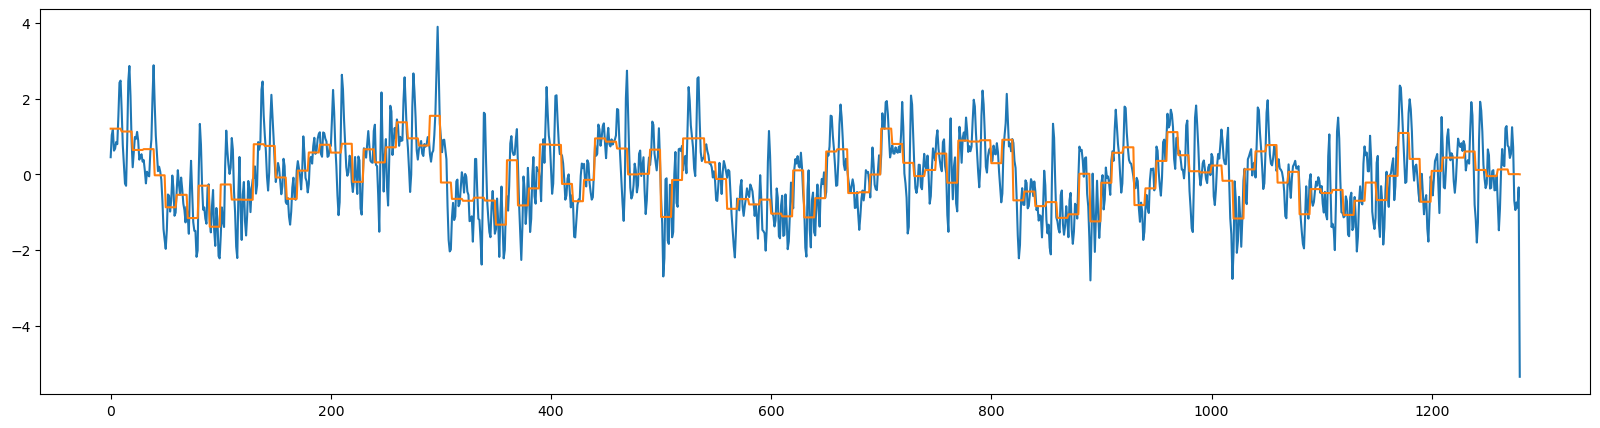

In [88]:
plt.figure(figsize=(20,5))
paa_inv = paa.inverse_transform(X_train_paa_o)
plt.plot(X_train_scaled_o[0,:, 0])
plt.plot(paa_inv[0, :, 0])
plt.show()

# Clustering - Array Transforms - PAA

In [89]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [90]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [91]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [92]:
import numpy as np
import scipy.stats as stats
from sklearn.metrics import pairwise_distances
import zlib
import string

In [93]:
df_train_paa_filled = df_train_paa.fillna(0)
df_train_paa_filled

0         1         2         3         4         5         6    \
0     1.213316  1.137814  0.645861  0.667724 -0.030246 -0.883547 -0.550595   
1    -0.894891  0.175508 -1.001188  0.503465  0.097005  0.299594 -0.411864   
2    -0.530394 -0.235853  0.049461  0.230400  0.219451  0.080678 -0.170327   
3    -0.084513 -0.118392 -0.062462  0.898557  1.112714  0.182046  0.960317   
4    -0.892988 -0.990429 -0.662160 -0.873229 -0.054402  1.995279  0.562312   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.578369 -0.206714 -0.795595 -0.267347 -0.591074 -0.498849  0.530306   
9996 -0.737184 -0.107619  0.818489  0.445472 -0.744383 -0.598006 -0.442748   
9997  0.147410  0.677656  0.705241  2.374190  1.158070  0.705399  0.425836   
9998 -0.735554 -1.194928 -0.841349 -1.306410 -1.430784 -1.711174 -0.827561   
9999 -1.662594 -1.069539 -1.388599 -1.005327 -0.656248 -0.778436 -0.965052   

           7         8         9    ...       118       119       120  \
0    -1.170824 -0.307245 -1.401895  ...  0.406954 -0.736809  0.087550   
1    -0.333397  0.604469 -0.067900  ... -0.161277  0.752944 -0.749253   
2    -0.845310 -0.626803 -1.071117  ...  1.062128 -0.359995 -1.022373   
3     0.829887 -0.265665  0.029650  ... -0.306040 -1.208996 -0.543111   
4     0.589704  1.856029 -0.258994  ... -0.306163 -0.008890  0.450035   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.367928 -0.441712 -0.424688  ...  0.633663  0.024735  0.572892   
9996 -0.399371  0.454201  0.709059  ... -0.446921 -0.342456 -0.183811   
9997 -0.450086 -0.550773  1.168113  ... -0.435684  0.024149  1.436833   
9998 -0.780702  0.026650 -0.932197  ... -1.120248 -0.671197  0.001903   
9999 -0.971209 -1.073178 -1.458200  ...  0.563861  0.722091  0.364930   

           121       122       123       124       125       126       127  
0     0.440579  0.441892  0.604900  0.111871 -0.051805  0.125596  0.000543  
1     0.276499  0.077610 -0.174617 -0.272169  0.573583  0.530571  0.157667  
2    -1.050350 -1.669592 -0.886968 -1.146626 -0.814815 -0.244521 -0.581068  
3    -0.611405 -1.343328 -0.154571 -0.069221 -1.032356 -0.673896 -0.066354  
4     1.214581  0.918433  0.476851 -0.038129 -0.313122 -0.491248 -0.802761  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.152033 -0.054652 -0.434529 -0.930654 -1.045076 -0.046296 -0.780812  
9996  0.682221 -0.277592 -0.538303 -0.547909 -0.328605  1.393899  0.232068  
9997 -0.425480  2.275624  0.903240  0.916925 -0.130132  1.603048 -0.613206  
9998  0.176313  0.332818  0.376011 -0.025333  0.235966  1.162368 -0.633367  
9999 -1.420083 -2.087483 -2.273128 -1.833247 -1.667915 -2.177683 -1.970210  

[10000 rows x 128 columns]

In [ ]:
sse = [] 
# fit the KMeans model to the data with a range of different numbers of clusters
for k in range(2, 50):
    kmeans = KMeans(init='k-means++',n_clusters=k, n_init=10, max_iter=200)
    kmeans.fit(df_train_paa_filled)
    sse.append(kmeans.inertia_)  # add the sum of squared distances for the current number of clusters to the list

In [95]:
sse

[684296.9315228781,
 670765.6446049513,
 661231.3929028318,
 654763.9783376215,
 649563.6401400759,
 644775.8488433997,
 641083.9123616922,
 637629.3697878025,
 634762.7035703517,
 631895.1702053846,
 629275.3059770721,
 627029.8702507508,
 625176.0763919374,
 623217.5585829797,
 621400.5870577926,
 620000.7899454245,
 618394.1797060474,
 616945.7865245792,
 615673.6875820914,
 614136.3931060915,
 613210.05752832,
 612104.7417819427,
 611041.4895864455,
 609678.4865050373,
 608990.5492465426,
 607922.5596229795,
 606929.5833119656,
 606069.5287767125,
 604956.1378012961,
 603997.5903750055,
 603200.5918194719,
 602877.9078566136,
 601812.4205716302,
 600695.6978570479,
 600453.8510609969,
 599414.3793505225,
 598883.844381382,
 598032.1531589514,
 597488.1052503864,
 596758.6126922191,
 596104.5051829526,
 595220.909871435,
 594836.2852141819,
 594446.9385503777,
 593660.0173245663,
 593261.5413371199,
 592177.5703009902,
 591993.8094154883]

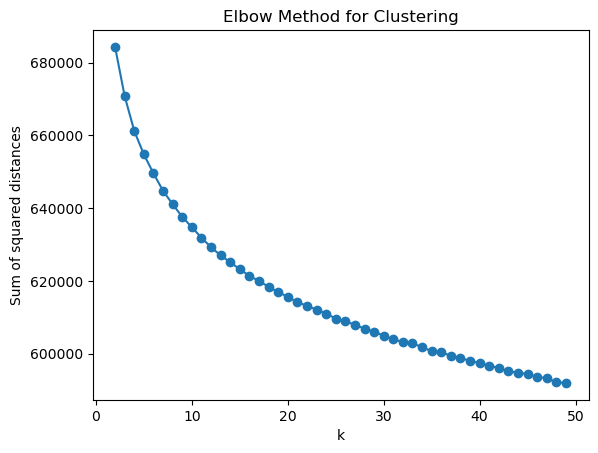

In [96]:
plt.plot(range(2, 50), sse, marker='o')
plt.title('Elbow Method for Clustering')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.show()

In [97]:
from sklearn.metrics import silhouette_samples, silhouette_score
elbow = dict()
silhouette = dict()
for i in range(2, 25):
    kmeans = KMeans(init='k-means++', n_clusters=i)
    clusters = kmeans.fit_predict(df_train_paa_filled)
    elbow[i] = kmeans.inertia_
    silhouette[i] = silhouette_score(df_train_paa_filled, clusters)

/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

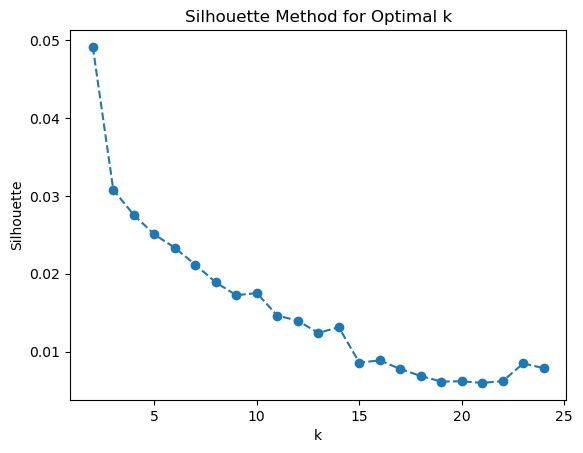

In [98]:
plt.plot(*zip(*silhouette.items()), marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal k')
plt.ylabel('Silhouette')
plt.xlabel('k');

#### Euclidean distance

In [99]:
km = TimeSeriesKMeans(n_clusters=8, 
                      metric="euclidean",
                      max_iter=100,
                      random_state=0)
km.fit(df_train_paa_filled)

TimeSeriesKMeans(max_iter=100, n_clusters=8, random_state=0)

In [100]:
km.cluster_centers_.shape

(8, 128, 1)

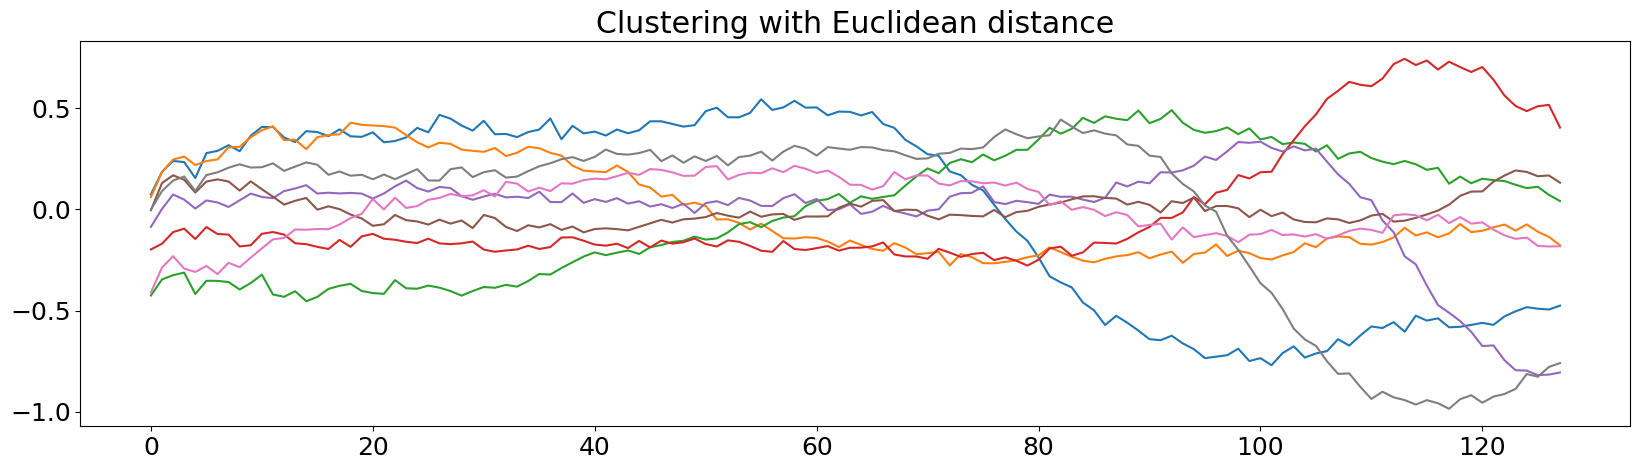

In [ ]:
# centroids of each cluster
plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = 18
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.title("Clustering with Euclidean distance")
plt.savefig("tskm_euclidean_centers.pdf")

In [102]:
df_train_paa_filled

0         1         2         3         4         5         6    \
0     1.213316  1.137814  0.645861  0.667724 -0.030246 -0.883547 -0.550595   
1    -0.894891  0.175508 -1.001188  0.503465  0.097005  0.299594 -0.411864   
2    -0.530394 -0.235853  0.049461  0.230400  0.219451  0.080678 -0.170327   
3    -0.084513 -0.118392 -0.062462  0.898557  1.112714  0.182046  0.960317   
4    -0.892988 -0.990429 -0.662160 -0.873229 -0.054402  1.995279  0.562312   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.578369 -0.206714 -0.795595 -0.267347 -0.591074 -0.498849  0.530306   
9996 -0.737184 -0.107619  0.818489  0.445472 -0.744383 -0.598006 -0.442748   
9997  0.147410  0.677656  0.705241  2.374190  1.158070  0.705399  0.425836   
9998 -0.735554 -1.194928 -0.841349 -1.306410 -1.430784 -1.711174 -0.827561   
9999 -1.662594 -1.069539 -1.388599 -1.005327 -0.656248 -0.778436 -0.965052   

           7         8         9    ...       118       119       120  \
0    -1.170824 -0.307245 -1.401895  ...  0.406954 -0.736809  0.087550   
1    -0.333397  0.604469 -0.067900  ... -0.161277  0.752944 -0.749253   
2    -0.845310 -0.626803 -1.071117  ...  1.062128 -0.359995 -1.022373   
3     0.829887 -0.265665  0.029650  ... -0.306040 -1.208996 -0.543111   
4     0.589704  1.856029 -0.258994  ... -0.306163 -0.008890  0.450035   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.367928 -0.441712 -0.424688  ...  0.633663  0.024735  0.572892   
9996 -0.399371  0.454201  0.709059  ... -0.446921 -0.342456 -0.183811   
9997 -0.450086 -0.550773  1.168113  ... -0.435684  0.024149  1.436833   
9998 -0.780702  0.026650 -0.932197  ... -1.120248 -0.671197  0.001903   
9999 -0.971209 -1.073178 -1.458200  ...  0.563861  0.722091  0.364930   

           121       122       123       124       125       126       127  
0     0.440579  0.441892  0.604900  0.111871 -0.051805  0.125596  0.000543  
1     0.276499  0.077610 -0.174617 -0.272169  0.573583  0.530571  0.157667  
2    -1.050350 -1.669592 -0.886968 -1.146626 -0.814815 -0.244521 -0.581068  
3    -0.611405 -1.343328 -0.154571 -0.069221 -1.032356 -0.673896 -0.066354  
4     1.214581  0.918433  0.476851 -0.038129 -0.313122 -0.491248 -0.802761  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.152033 -0.054652 -0.434529 -0.930654 -1.045076 -0.046296 -0.780812  
9996  0.682221 -0.277592 -0.538303 -0.547909 -0.328605  1.393899  0.232068  
9997 -0.425480  2.275624  0.903240  0.916925 -0.130132  1.603048 -0.613206  
9998  0.176313  0.332818  0.376011 -0.025333  0.235966  1.162368 -0.633367  
9999 -1.420083 -2.087483 -2.273128 -1.833247 -1.667915 -2.177683 -1.970210  

[10000 rows x 128 columns]

In [103]:
km.inertia_

64.15907764612254

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_train_paa_filled)
X_train_pca = pca.transform(df_train_paa_filled)

In [105]:
X_train_pca.shape

(10000, 2)

In [106]:
labels_pca = km.fit_predict(X_train_pca)

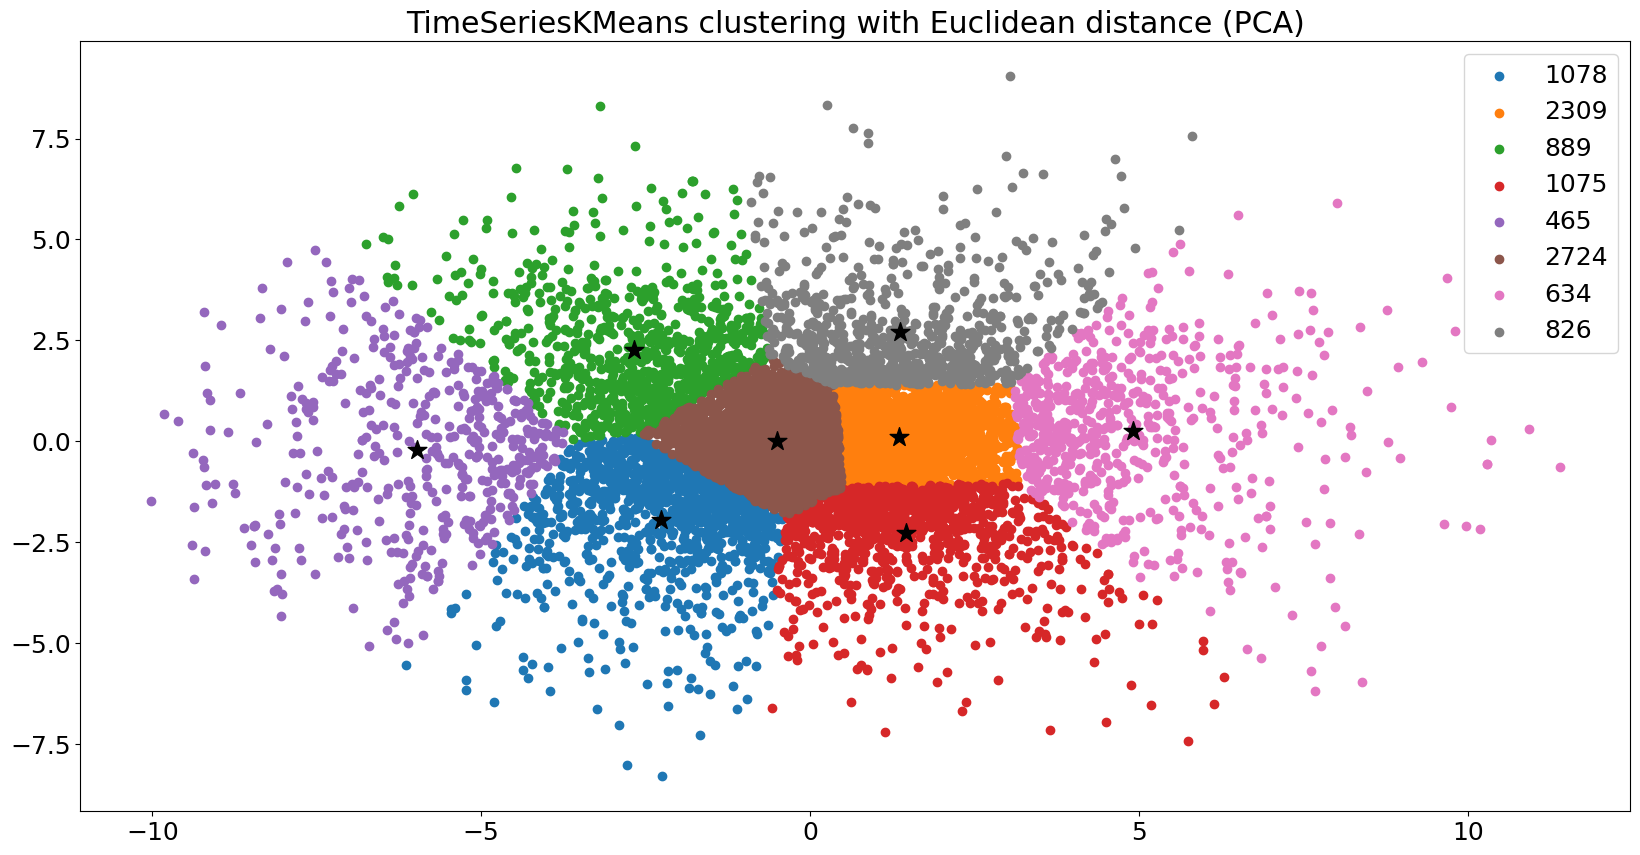

In [107]:
centroids = km.cluster_centers_
u_labels = np.unique(labels_pca)

plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
for i in u_labels:
    plt.scatter(X_train_pca[labels_pca == i , 0] , X_train_pca[labels_pca == i , 1] , label = len(labels_pca[labels_pca==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("TimeSeriesKMeans clustering with Euclidean distance (PCA)")
plt.legend()

## Clustering Oridinal data

In [172]:
df_train_sax_filled = df_train_sax.fillna(0)
df_train_sax_filled

0         1         2         3         4         5         6    \
0     1.213316  1.137814  0.645861  0.667724 -0.030246 -0.883547 -0.550595   
1    -0.894891  0.175508 -1.001188  0.503465  0.097005  0.299594 -0.411864   
2    -0.530394 -0.235853  0.049461  0.230400  0.219451  0.080678 -0.170327   
3    -0.084513 -0.118392 -0.062462  0.898557  1.112714  0.182046  0.960317   
4    -0.892988 -0.990429 -0.662160 -0.873229 -0.054402  1.995279  0.562312   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.578369 -0.206714 -0.795595 -0.267347 -0.591074 -0.498849  0.530306   
9996 -0.737184 -0.107619  0.818489  0.445472 -0.744383 -0.598006 -0.442748   
9997  0.147410  0.677656  0.705241  2.374190  1.158070  0.705399  0.425836   
9998 -0.735554 -1.194928 -0.841349 -1.306410 -1.430784 -1.711174 -0.827561   
9999 -1.662594 -1.069539 -1.388599 -1.005327 -0.656248 -0.778436 -0.965052   

           7         8         9    ...       118       119       120  \
0    -1.170824 -0.307245 -1.401895  ...  0.406954 -0.736809  0.087550   
1    -0.333397  0.604469 -0.067900  ... -0.161277  0.752944 -0.749253   
2    -0.845310 -0.626803 -1.071117  ...  1.062128 -0.359995 -1.022373   
3     0.829887 -0.265665  0.029650  ... -0.306040 -1.208996 -0.543111   
4     0.589704  1.856029 -0.258994  ... -0.306163 -0.008890  0.450035   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.367928 -0.441712 -0.424688  ...  0.633663  0.024735  0.572892   
9996 -0.399371  0.454201  0.709059  ... -0.446921 -0.342456 -0.183811   
9997 -0.450086 -0.550773  1.168113  ... -0.435684  0.024149  1.436833   
9998 -0.780702  0.026650 -0.932197  ... -1.120248 -0.671197  0.001903   
9999 -0.971209 -1.073178 -1.458200  ...  0.563861  0.722091  0.364930   

           121       122       123       124       125       126       127  
0     0.440579  0.441892  0.604900  0.111871 -0.051805  0.125596  0.000543  
1     0.276499  0.077610 -0.174617 -0.272169  0.573583  0.530571  0.157667  
2    -1.050350 -1.669592 -0.886968 -1.146626 -0.814815 -0.244521 -0.581068  
3    -0.611405 -1.343328 -0.154571 -0.069221 -1.032356 -0.673896 -0.066354  
4     1.214581  0.918433  0.476851 -0.038129 -0.313122 -0.491248 -0.802761  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.152033 -0.054652 -0.434529 -0.930654 -1.045076 -0.046296 -0.780812  
9996  0.682221 -0.277592 -0.538303 -0.547909 -0.328605  1.393899  0.232068  
9997 -0.425480  2.275624  0.903240  0.916925 -0.130132  1.603048 -0.613206  
9998  0.176313  0.332818  0.376011 -0.025333  0.235966  1.162368 -0.633367  
9999 -1.420083 -2.087483 -2.273128 -1.833247 -1.667915 -2.177683 -1.970210  

[10000 rows x 128 columns]

In [ ]:
sse = [] 
# fit the KMeans model to the data with a range of different numbers of clusters
for k in range(2, 50):
    kmeans = KMeans(init='k-means++',n_clusters=k, n_init=10, max_iter=200)
    kmeans.fit(df_train_sax_filled)
    sse.append(kmeans.inertia_)  # add the sum of squared distances for the current number of clusters to the list

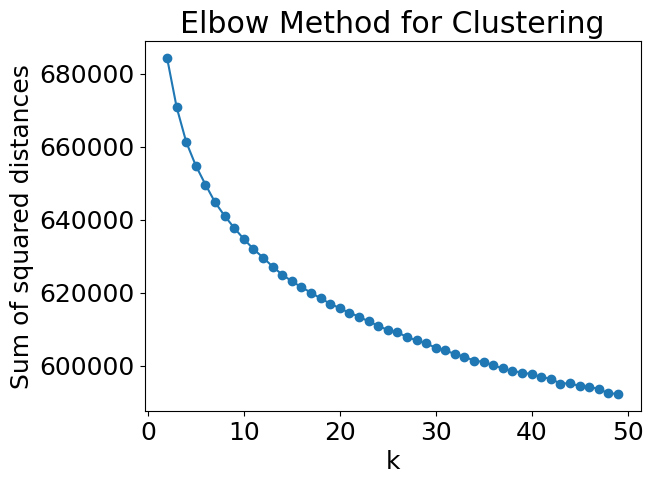

In [110]:
plt.plot(range(2, 50), sse, marker='o')
plt.title('Elbow Method for Clustering')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.show()

In [111]:
from sklearn.metrics import silhouette_samples, silhouette_score
elbow = dict()
silhouette = dict()
for i in range(2, 25):
    kmeans = KMeans(init='k-means++', n_clusters=i)
    clusters = kmeans.fit_predict(df_train_sax_filled)
    elbow[i] = kmeans.inertia_
    silhouette[i] = silhouette_score(df_train_sax_filled, clusters)

/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/giulianogelsomino/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

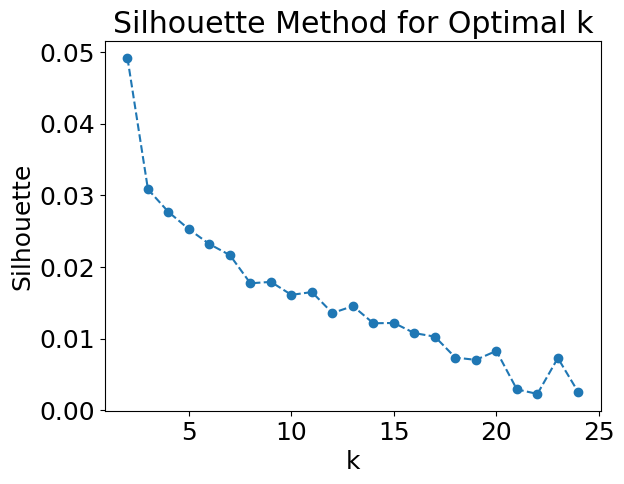

In [112]:
plt.plot(*zip(*silhouette.items()), marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal k')
plt.ylabel('Silhouette')
plt.xlabel('k');

In [113]:
km = TimeSeriesKMeans(n_clusters=7, 
                      metric="euclidean",
                      max_iter=100,
                      random_state=0)
km.fit(df_train_sax_filled)

TimeSeriesKMeans(max_iter=100, n_clusters=7, random_state=0)

In [114]:
km.inertia_

64.54686240544928

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_train_sax_filled)
X_train_pca = pca.transform(df_train_sax_filled)

In [116]:
labels_pca = km.fit_predict(X_train_pca)

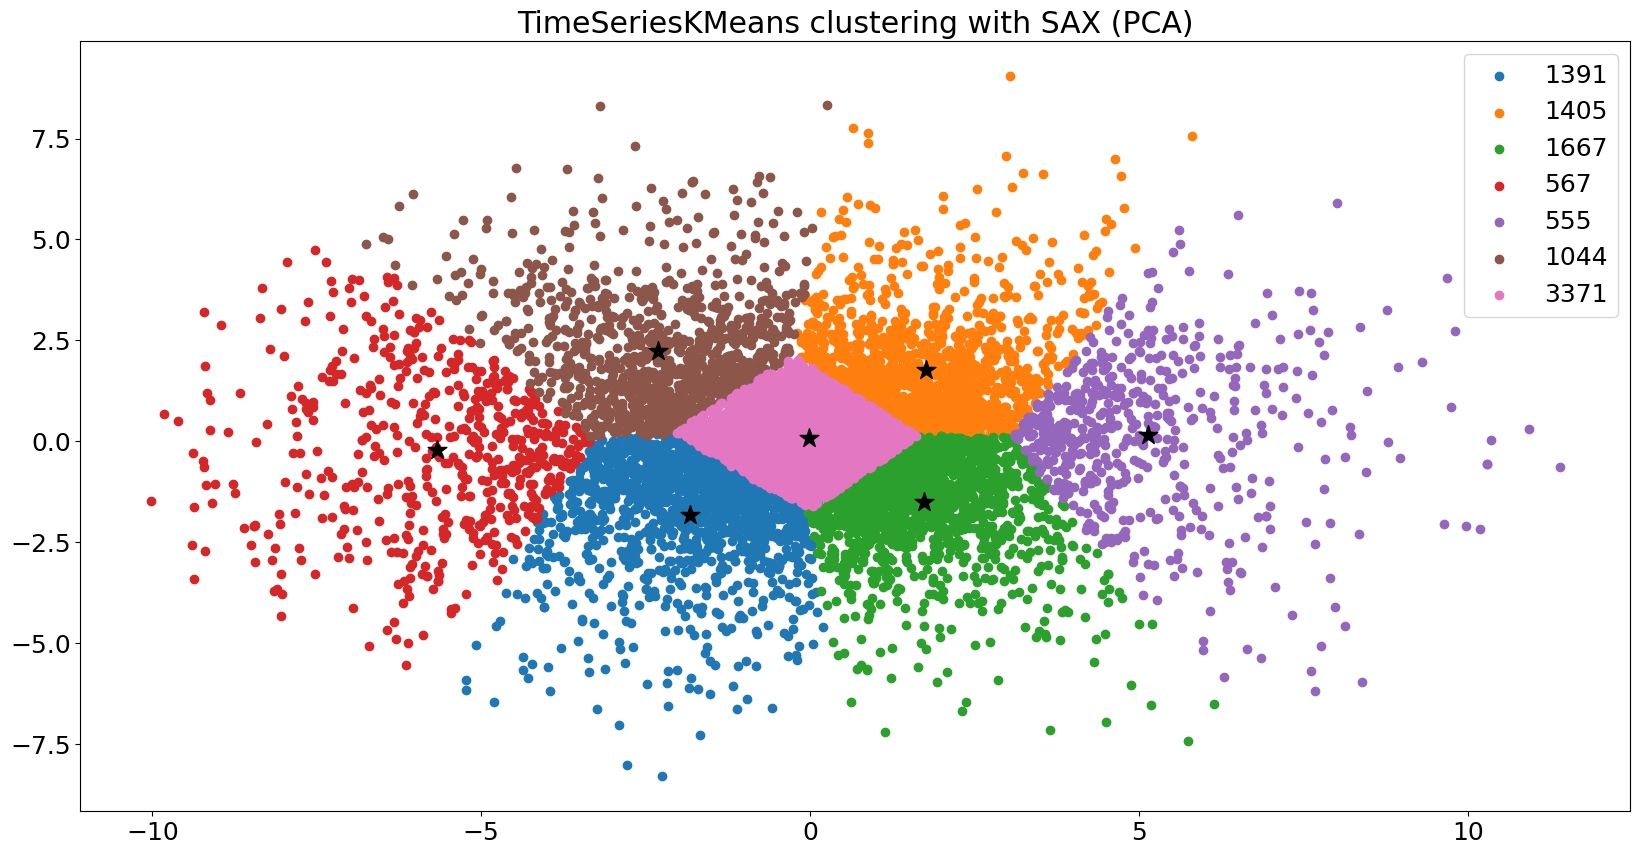

In [117]:
centroids = km.cluster_centers_
u_labels = np.unique(labels_pca)

plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 18
for i in u_labels:
    plt.scatter(X_train_pca[labels_pca == i , 0] , X_train_pca[labels_pca == i , 1] , label = len(labels_pca[labels_pca==i]))
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='*')
plt.title("TimeSeriesKMeans clustering with SAX (PCA)")
plt.legend()

In [173]:
df_train_sax_filled['cluster'] = labels_pca
df_train_sax_filled

0         1         2         3         4         5         6  \
0     1.213316  1.137814  0.645861  0.667724 -0.030246 -0.883547 -0.550595   
1    -0.894891  0.175508 -1.001188  0.503465  0.097005  0.299594 -0.411864   
2    -0.530394 -0.235853  0.049461  0.230400  0.219451  0.080678 -0.170327   
3    -0.084513 -0.118392 -0.062462  0.898557  1.112714  0.182046  0.960317   
4    -0.892988 -0.990429 -0.662160 -0.873229 -0.054402  1.995279  0.562312   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.578369 -0.206714 -0.795595 -0.267347 -0.591074 -0.498849  0.530306   
9996 -0.737184 -0.107619  0.818489  0.445472 -0.744383 -0.598006 -0.442748   
9997  0.147410  0.677656  0.705241  2.374190  1.158070  0.705399  0.425836   
9998 -0.735554 -1.194928 -0.841349 -1.306410 -1.430784 -1.711174 -0.827561   
9999 -1.662594 -1.069539 -1.388599 -1.005327 -0.656248 -0.778436 -0.965052   

             7         8         9  ...       119       120       121  \
0    -1.170824 -0.307245 -1.401895  ... -0.736809  0.087550  0.440579   
1    -0.333397  0.604469 -0.067900  ...  0.752944 -0.749253  0.276499   
2    -0.845310 -0.626803 -1.071117  ... -0.359995 -1.022373 -1.050350   
3     0.829887 -0.265665  0.029650  ... -1.208996 -0.543111 -0.611405   
4     0.589704  1.856029 -0.258994  ... -0.008890  0.450035  1.214581   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.367928 -0.441712 -0.424688  ...  0.024735  0.572892 -0.152033   
9996 -0.399371  0.454201  0.709059  ... -0.342456 -0.183811  0.682221   
9997 -0.450086 -0.550773  1.168113  ...  0.024149  1.436833 -0.425480   
9998 -0.780702  0.026650 -0.932197  ... -0.671197  0.001903  0.176313   
9999 -0.971209 -1.073178 -1.458200  ...  0.722091  0.364930 -1.420083   

           122       123       124       125       126       127  cluster  
0     0.441892  0.604900  0.111871 -0.051805  0.125596  0.000543        6  
1     0.077610 -0.174617 -0.272169  0.573583  0.530571  0.157667        6  
2    -1.669592 -0.886968 -1.146626 -0.814815 -0.244521 -0.581068        5  
3    -1.343328 -0.154571 -0.069221 -1.032356 -0.673896 -0.066354        6  
4     0.918433  0.476851 -0.038129 -0.313122 -0.491248 -0.802761        6  
...        ...       ...       ...       ...       ...       ...      ...  
9995 -0.054652 -0.434529 -0.930654 -1.045076 -0.046296 -0.780812        0  
9996 -0.277592 -0.538303 -0.547909 -0.328605  1.393899  0.232068        2  
9997  2.275624  0.903240  0.916925 -0.130132  1.603048 -0.613206        2  
9998  0.332818  0.376011 -0.025333  0.235966  1.162368 -0.633367        6  
9999 -2.087483 -2.273128 -1.833247 -1.667915 -2.177683 -1.970210        6  

[10000 rows x 129 columns]

In [174]:
df_train_sax_filled['genre'] = y
df_train_sax_filled

0         1         2         3         4         5         6  \
0     1.213316  1.137814  0.645861  0.667724 -0.030246 -0.883547 -0.550595   
1    -0.894891  0.175508 -1.001188  0.503465  0.097005  0.299594 -0.411864   
2    -0.530394 -0.235853  0.049461  0.230400  0.219451  0.080678 -0.170327   
3    -0.084513 -0.118392 -0.062462  0.898557  1.112714  0.182046  0.960317   
4    -0.892988 -0.990429 -0.662160 -0.873229 -0.054402  1.995279  0.562312   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.578369 -0.206714 -0.795595 -0.267347 -0.591074 -0.498849  0.530306   
9996 -0.737184 -0.107619  0.818489  0.445472 -0.744383 -0.598006 -0.442748   
9997  0.147410  0.677656  0.705241  2.374190  1.158070  0.705399  0.425836   
9998 -0.735554 -1.194928 -0.841349 -1.306410 -1.430784 -1.711174 -0.827561   
9999 -1.662594 -1.069539 -1.388599 -1.005327 -0.656248 -0.778436 -0.965052   

             7         8         9  ...       120       121       122  \
0    -1.170824 -0.307245 -1.401895  ...  0.087550  0.440579  0.441892   
1    -0.333397  0.604469 -0.067900  ... -0.749253  0.276499  0.077610   
2    -0.845310 -0.626803 -1.071117  ... -1.022373 -1.050350 -1.669592   
3     0.829887 -0.265665  0.029650  ... -0.543111 -0.611405 -1.343328   
4     0.589704  1.856029 -0.258994  ...  0.450035  1.214581  0.918433   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.367928 -0.441712 -0.424688  ...  0.572892 -0.152033 -0.054652   
9996 -0.399371  0.454201  0.709059  ... -0.183811  0.682221 -0.277592   
9997 -0.450086 -0.550773  1.168113  ...  1.436833 -0.425480  2.275624   
9998 -0.780702  0.026650 -0.932197  ...  0.001903  0.176313  0.332818   
9999 -0.971209 -1.073178 -1.458200  ...  0.364930 -1.420083 -2.087483   

           123       124       125       126       127  cluster  \
0     0.604900  0.111871 -0.051805  0.125596  0.000543        6   
1    -0.174617 -0.272169  0.573583  0.530571  0.157667        6   
2    -0.886968 -1.146626 -0.814815 -0.244521 -0.581068        5   
3    -0.154571 -0.069221 -1.032356 -0.673896 -0.066354        6   
4     0.476851 -0.038129 -0.313122 -0.491248 -0.802761        6   
...        ...       ...       ...       ...       ...      ...   
9995 -0.434529 -0.930654 -1.045076 -0.046296 -0.780812        0   
9996 -0.538303 -0.547909 -0.328605  1.393899  0.232068        2   
9997  0.903240  0.916925 -0.130132  1.603048 -0.613206        2   
9998  0.376011 -0.025333  0.235966  1.162368 -0.633367        6   
9999 -2.273128 -1.833247 -1.667915 -2.177683 -1.970210        6   

               genre  
0              opera  
1     minimal-techno  
2               goth  
3              opera  
4     minimal-techno  
...              ...  
9995           sleep  
9996      songwriter  
9997            kids  
9998            kids  
9999           salsa  

[10000 rows x 130 columns]

In [142]:
def plot_cluster_genres(cluster):
    cluster_data = df_train_sax_filled[df_train_sax_filled['cluster'] == cluster]
    genre_counts = cluster_data['genre'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    genre_counts.plot(kind='bar')
    plt.title(f'Cluster {cluster}: Top 10 Generi Musicali')
    plt.xlabel('Genere')
    plt.ylabel('Frequenza')
    plt.xticks(rotation=45)
    plt.show()

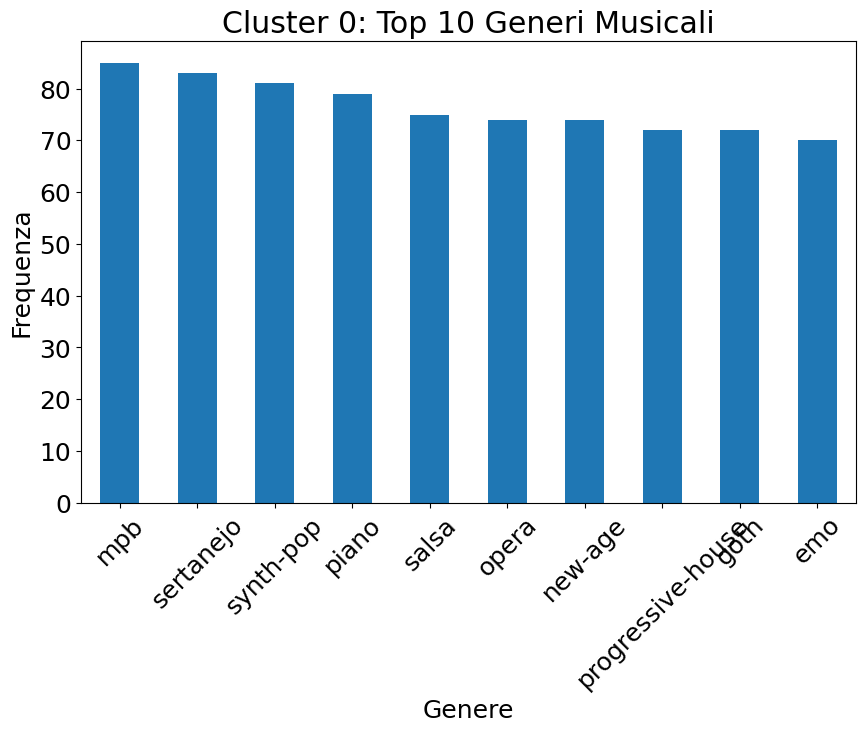

In [143]:
plot_cluster_genres(0)

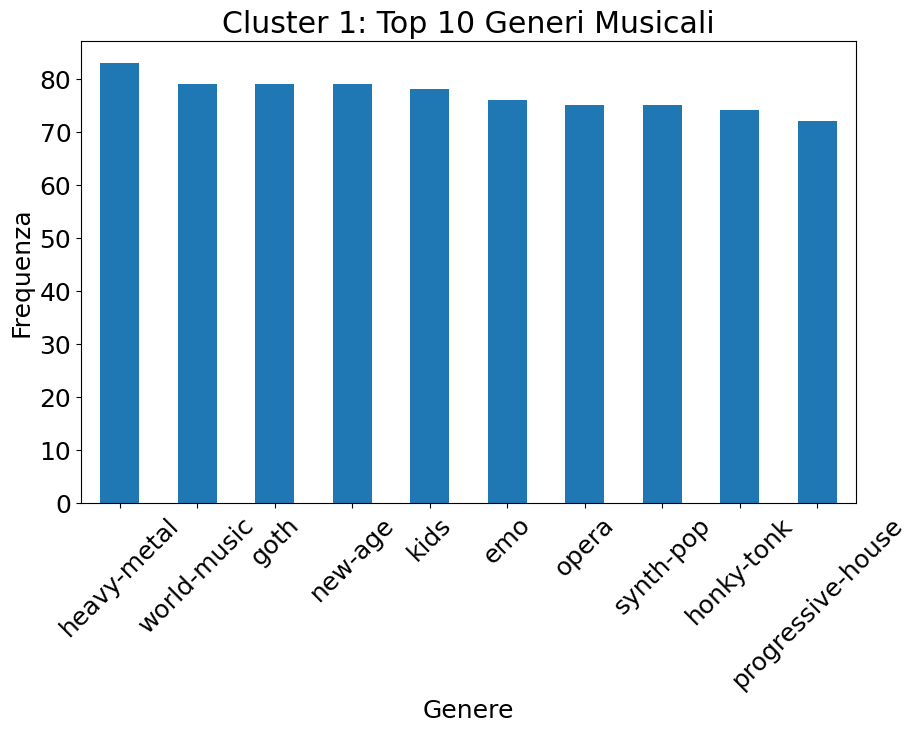

In [144]:
plot_cluster_genres(1)

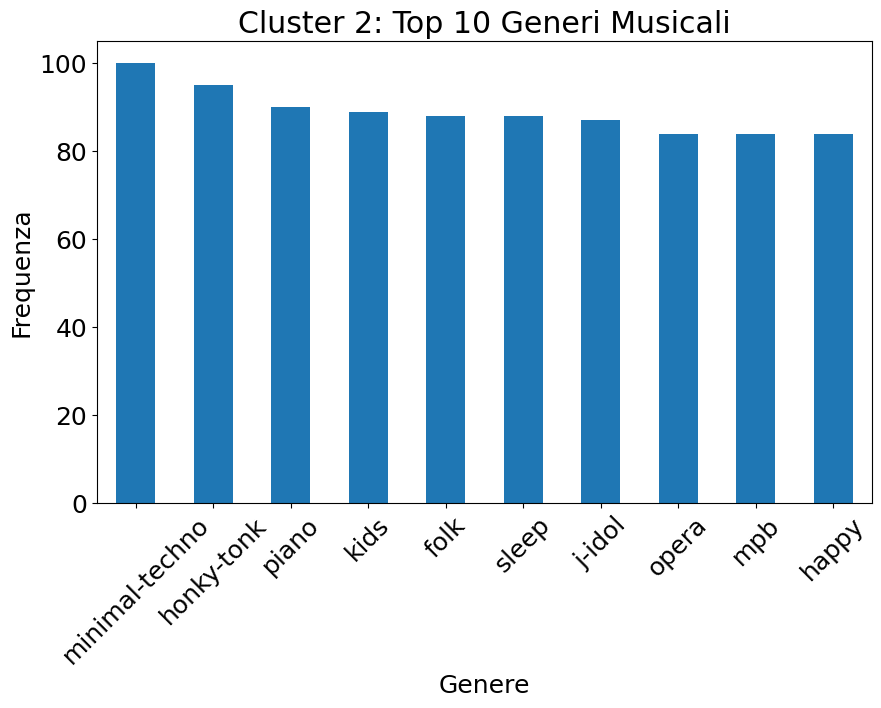

In [145]:
plot_cluster_genres(2)

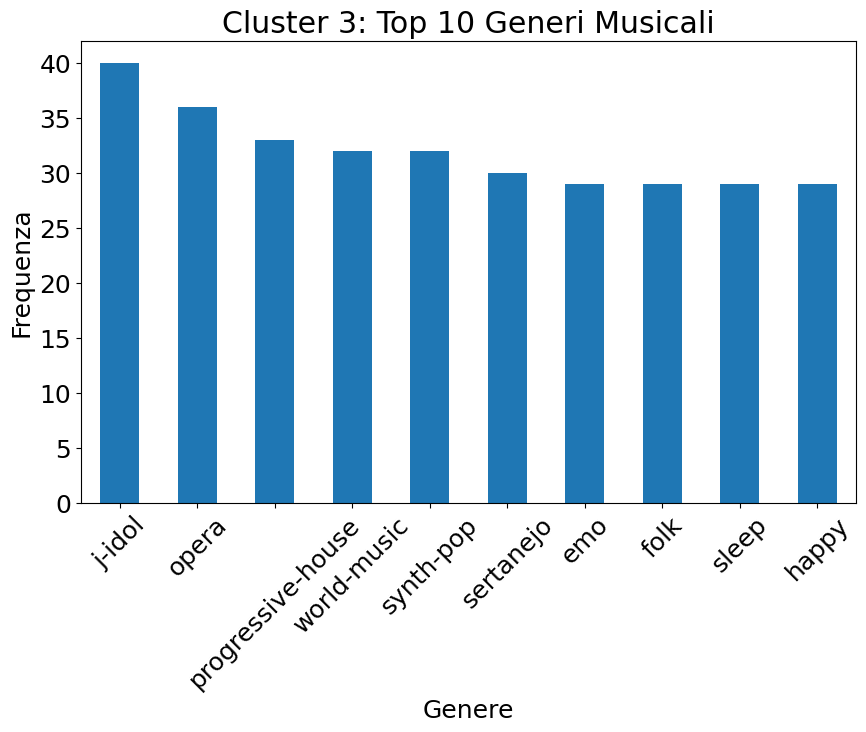

In [146]:
plot_cluster_genres(3)

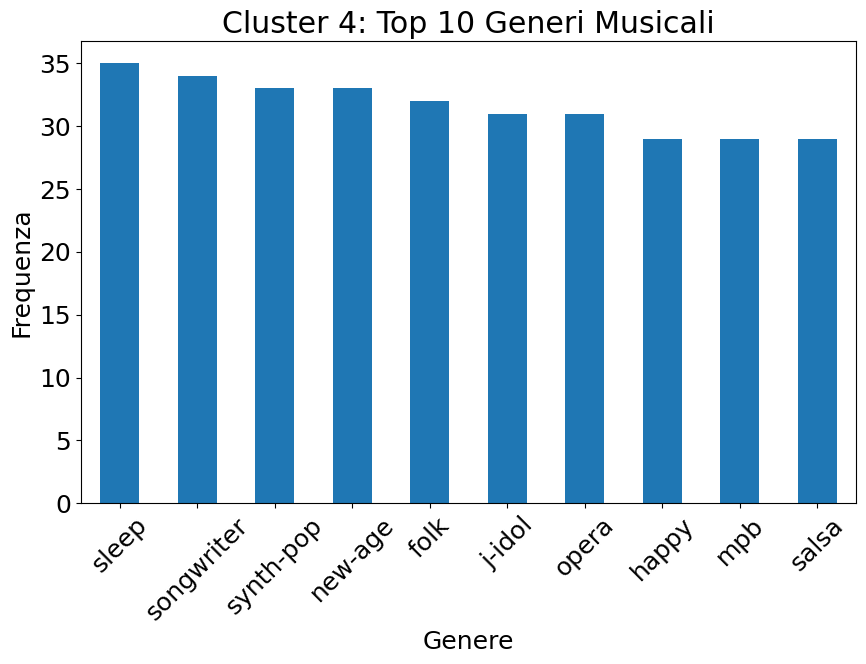

In [147]:
plot_cluster_genres(4)

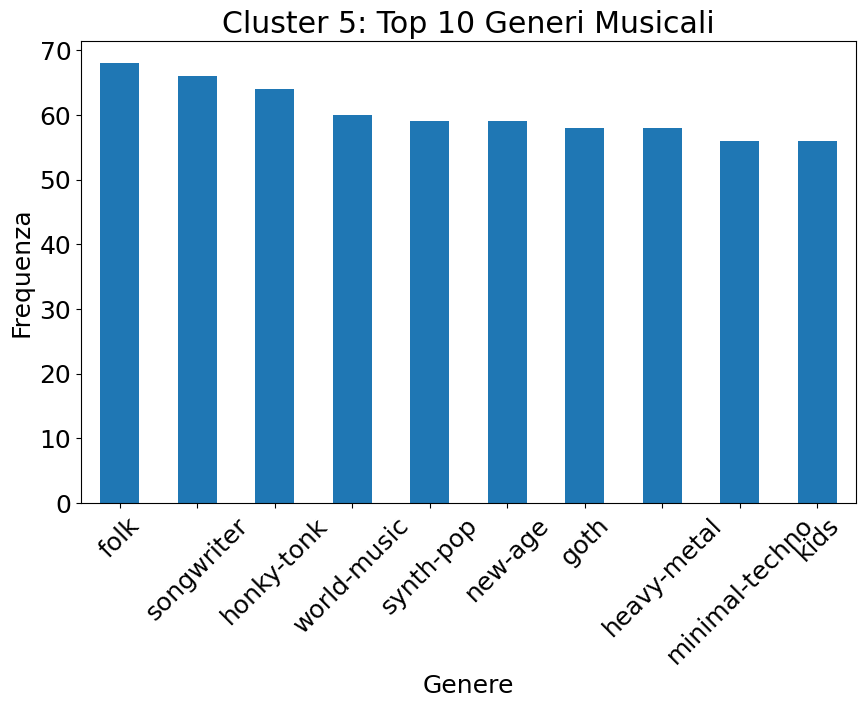

In [148]:
plot_cluster_genres(5)

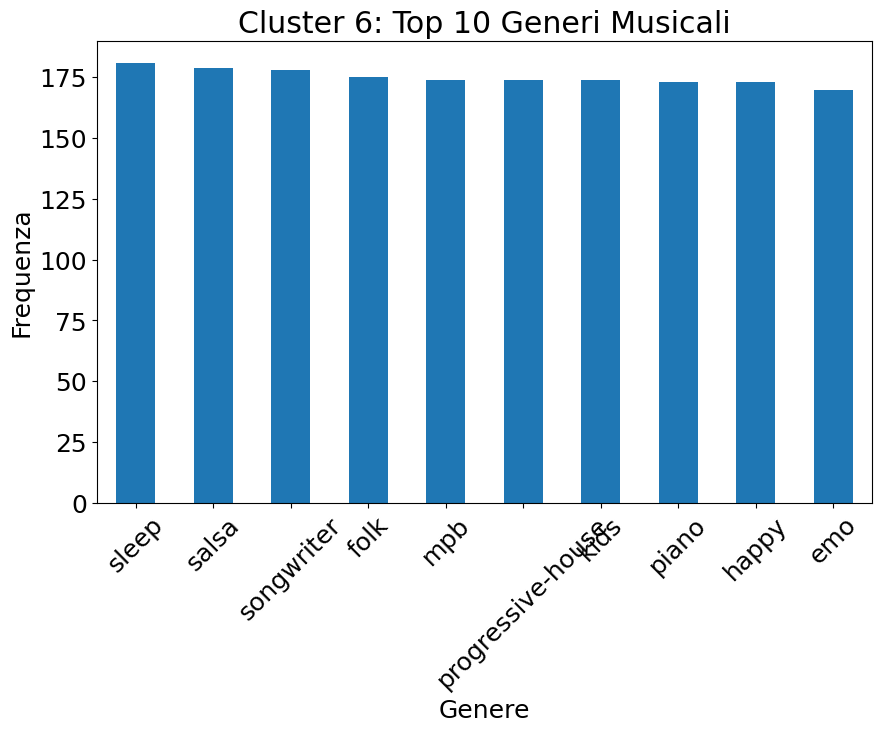

In [149]:
plot_cluster_genres(6)

In [150]:
!pip install matrixprofile-ts

In [187]:
from matrixprofile import *

In [ ]:
n_samples = 3

sampled_df = pd.DataFrame()

for cluster_id in df_train_sax_filled['cluster'].unique():
    cluster_data = df_train_sax_filled[df_train_sax_filled['cluster'] == cluster_id]
    sampled_data = cluster_data.sample(n=n_samples, random_state=1)
    sampled_df = pd.concat([sampled_df, sampled_data])

sampled_df.to_csv('sampled_timeseries.csv', index=False)

print("Time series campionate salvate in 'sampled_timeseries.csv'")

Time series campionate salvate in 'sampled_timeseries.csv'


In [ ]:
def calculate_matrix_profile(df, cluster_id, window_size):
    df_cluster = df[df['cluster'] == cluster_id]
    df_time_series = df_cluster.drop(columns=['cluster', 'genre'])
    cluster_matrix_profiles = []
    for idx, row in df_time_series.iterrows():
        time_series = row.values.astype(float)
        mp, mpi = matrixProfile.stomp(time_series, window_size)
        cluster_matrix_profiles.append((mp, mpi))
    
    return cluster_matrix_profiles

In [ ]:

def find_and_plot_motifs(df, cluster_id, window_size, max_motifs=5):
    cluster_matrix_profiles = calculate_matrix_profile(df, cluster_id, window_size)
    colors = ['r', 'g', 'k', 'b', 'y']

    for idx, (mp, mpi) in enumerate(cluster_matrix_profiles):
        time_series = df[df['cluster'] == cluster_id].iloc[idx].drop(['cluster', 'genre']).values.astype(float)
        mo, mod = motifs.motifs(time_series, (mp, mpi), max_motifs=max_motifs)
        plt.figure(figsize=(10, 5))
        plt.plot(time_series, label="Original Time Series")i
        for m, d, c in zip(mo, mod, colors[:len(mo)]):
            for i in m:
                m_shape = time_series[i:i+window_size]
                plt.plot(range(i, i+window_size), m_shape, color=c, lw=3, label=f"Motif {i}")
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.show()

In [ ]:
def plot_single_motifs(df, cluster_id, time_series_index, window_size, max_motifs=5):
    cluster_matrix_profiles = calculate_matrix_profile(df, cluster_id, window_size)
    colors = ['r', 'g', 'k', 'b', 'y']
    mp, mpi = cluster_matrix_profiles[time_series_index - 1]
    time_series = df[df['cluster'] == cluster_id].iloc[time_series_index - 1].drop(['cluster', 'genre']).values.astype(float)
    mo, mod = motifs.motifs(time_series, (mp, mpi), max_motifs=max_motifs)
    for m, d, c in zip(mo, mod, colors[:len(mo)]):
        for i in m:
            plt.figure(figsize=(3, 2))
            plt.plot(range(i, i+window_size), time_series[i:i+window_size], color=c, lw=3)
            plt.title(f"Single Motif at index {i} for Time Series {time_series_index} in Cluster {cluster_id}")
            plt.xlabel("Index")
            plt.ylabel("Value")
            plt.show()


In [ ]:
df = pd.read_csv('sampled_timeseries.csv')
cluster_id = 6 
window_size = 5


In [193]:
cluster_matrix_profiles = calculate_matrix_profile(df, cluster_id, window_size)


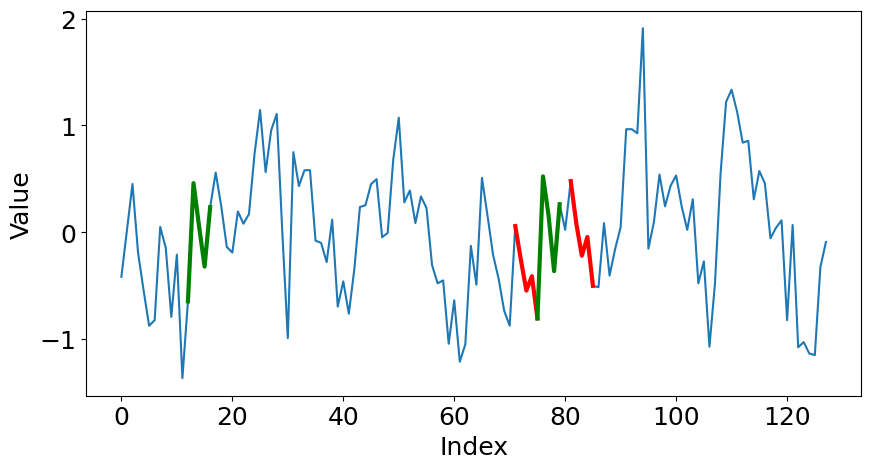

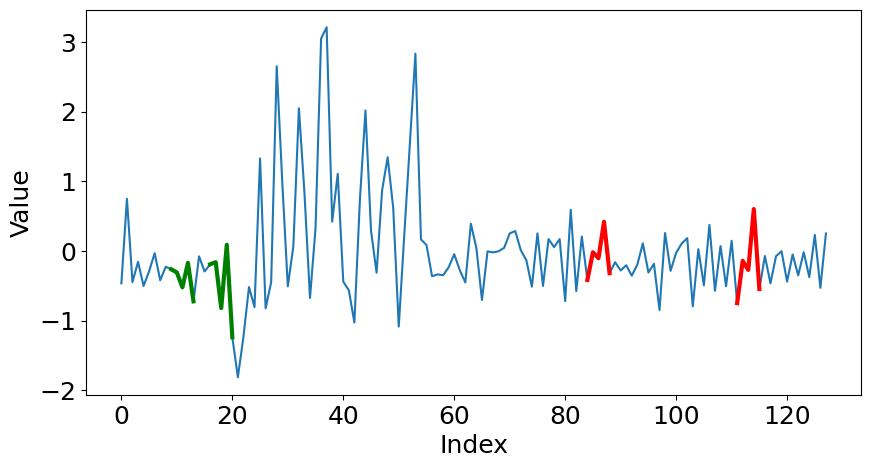

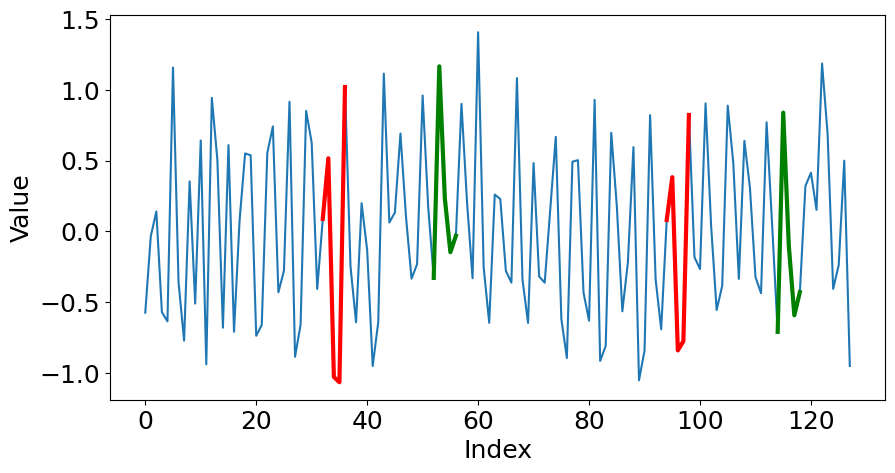

In [205]:
find_and_plot_motifs(df, cluster_id, window_size, max_motifs=2)


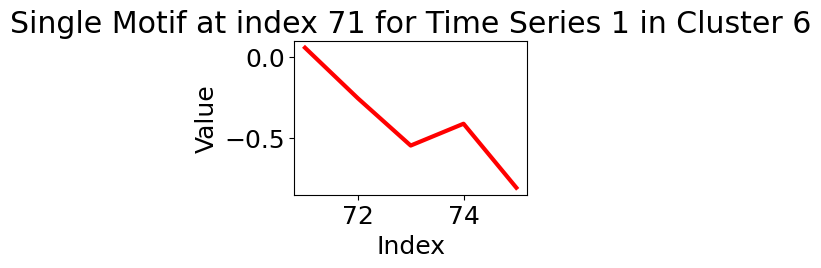

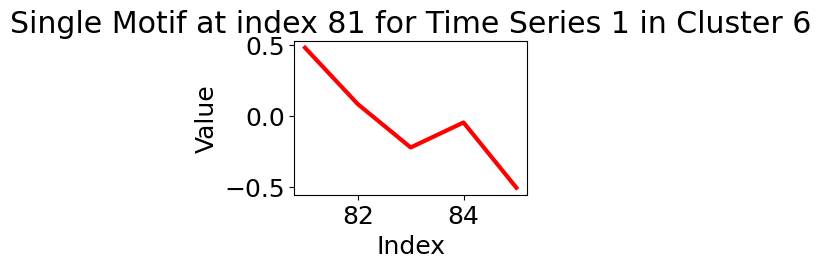

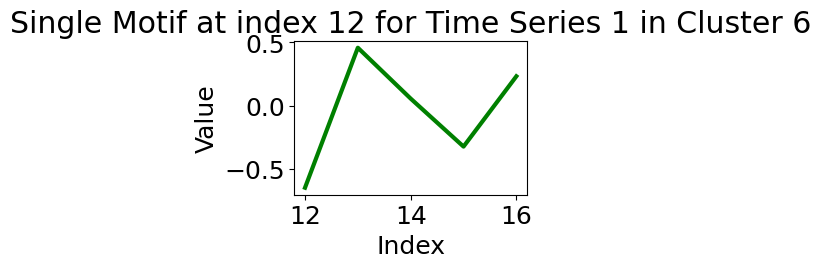

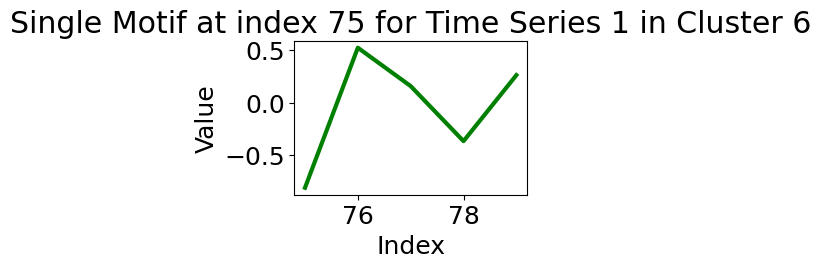

In [204]:
plot_single_motifs(df, cluster_id,1, window_size, max_motifs=2)

In [208]:
from matrixprofile.discords import discords

In [ ]:
def find_and_plot_anomalies(df, cluster_id, window_size, k=2, ex_zone=3):
    cluster_matrix_profiles = calculate_matrix_profile(df, cluster_id, window_size)
    for idx, (mp, mpi) in enumerate(cluster_matrix_profiles):
        time_series = df[df['cluster'] == cluster_id].iloc[idx].drop(['cluster', 'genre']).values.astype(float)
        discord = discords(mp, ex_zone=ex_zone, k=k)
        plt.figure(figsize=(10, 5))
        plt.plot(time_series, label="Original Time Series")
        for anom in discord:
            anom_shape = time_series[anom:anom+window_size]
            plt.plot(range(anom, anom+window_size), anom_shape, color='r', lw=3, label=f"Anomaly {anom}")
        plt.title(f"Anomalies for Time Series {idx} in Cluster {cluster_id}")
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.show()

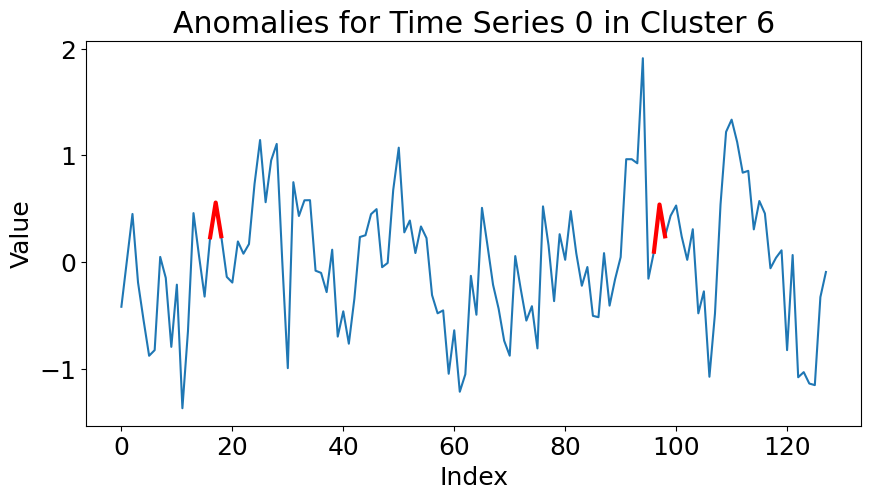

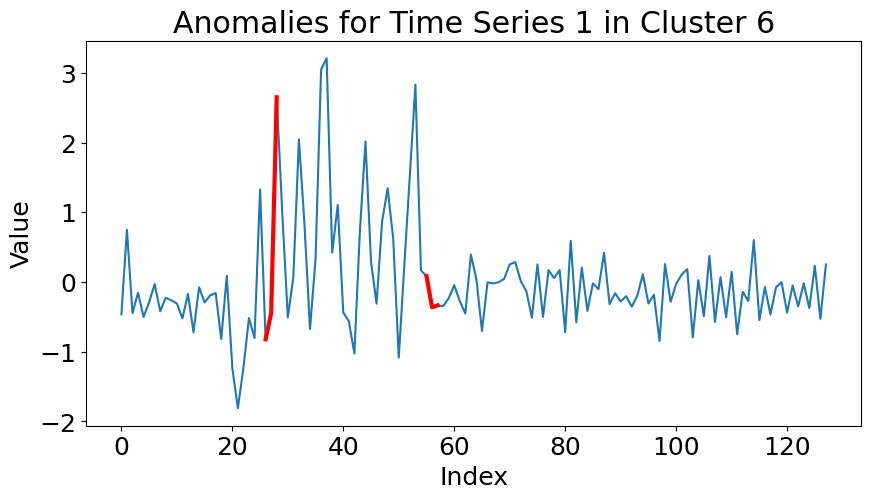

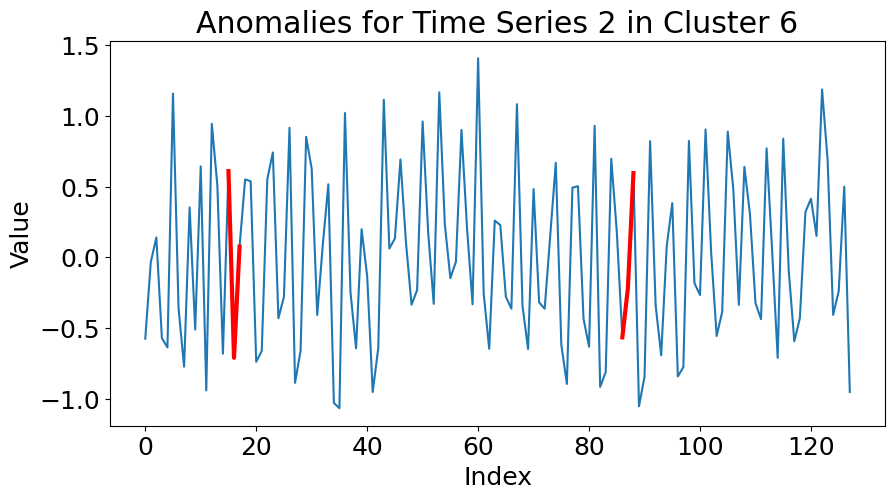

In [ ]:
df = pd.read_csv('sampled_timeseries.csv')
cluster_id = 6 
window_size = 3
find_and_plot_anomalies(df, cluster_id, window_size, k=2, ex_zone=3)